# Necessary imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset import and basic exploration

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Healthcare Providers.csv")
df.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [ ]:
df.describe()

,index,National Provider Identifier,Zip Code of the Provider
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,4.907646e+06,1.498227e+09,4.163820e+08
std,2.839633e+06,2.874125e+08,3.082566e+08
min,2.090000e+02,1.003001e+09,6.010000e+02
25%,2.458791e+06,1.245669e+09,1.426300e+08
50%,4.901266e+06,1.497847e+09,3.633025e+08
75%,7.349450e+06,1.740374e+09,6.819881e+08
max,9.847440e+06,1.993000e+09,9.990166e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [ ]:
for i in df:
  print("Column", i, "has", len(df[i].unique()), "unique values.")

Column index has 100000 unique values.
Column National Provider Identifier has 89508 unique values.
Column Last Name/Organization Name of the Provider has 42820 unique values.
Column First Name of the Provider has 13023 unique values.
Column Middle Initial of the Provider has 30 unique values.
Column Credentials of the Provider has 1855 unique values.
Column Gender of the Provider has 3 unique values.
Column Entity Type of the Provider has 2 unique values.
Column Street Address 1 of the Provider has 51928 unique values.
Column Street Address 2 of the Provider has 10025 unique values.
Column City of the Provider has 5846 unique values.
Column Zip Code of the Provider has 47827 unique values.
Column State Code of the Provider has 58 unique values.
Column Country Code of the Provider has 4 unique values.
Column Provider Type has 90 unique values.
Column Medicare Participation Indicator has 2 unique values.
Column Place of Service has 2 unique values.
Column HCPCS Code has 2631 unique valu

## Handling Null Values

A lot of NaNs found!

In [ ]:
df.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

No duplicates found

In [ ]:
df.duplicated().sum()

0

Handled NaNs by filling them with modes of their columns

In [ ]:
def fill_nan(data, col):
  data[col] = data[col].fillna(data[col].value_counts().index[0])

nan_cols = ["First Name of the Provider", 
            "Middle Initial of the Provider", 
            "Credentials of the Provider", 
            "Gender of the Provider", 
            "Street Address 2 of the Provider"]

for i in nan_cols:
  fill_nan(df, i)

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Categorical columns are:
cat_cols = ['Last Name/Organization Name of the Provider',
            'First Name of the Provider',
            'Middle Initial of the Provider',
            'Credentials of the Provider',
            'Gender of the Provider',
            'Entity Type of the Provider',
            'Street Address 1 of the Provider',
            'Street Address 2 of the Provider',
            'City of the Provider',
            'State Code of the Provider',
            'Country Code of the Provider',
            'Provider Type',
            'Medicare Participation Indicator',
            'Place of Service', 'HCPCS Code',
            'HCPCS Description', 'HCPCS Drug Indicator',
            
            ]
l = LabelEncoder()
for i in cat_cols:
    df[i] = l.fit_transform(df[i])

# Fixed the datatype of numerical columns

In [ ]:
def convert_strnum_to_float(x):
    return float(x.replace(',', ''))

numerical_cols = ['Number of Services', 'Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services', "Average Medicare Allowed Amount", "Average Submitted Charge Amount", "Average Medicare Payment Amount", "Average Medicare Standardized Amount"]

for i in numerical_cols:
    df[i] = df[i].apply(convert_strnum_to_float)

# Data Visualization

## Histograms

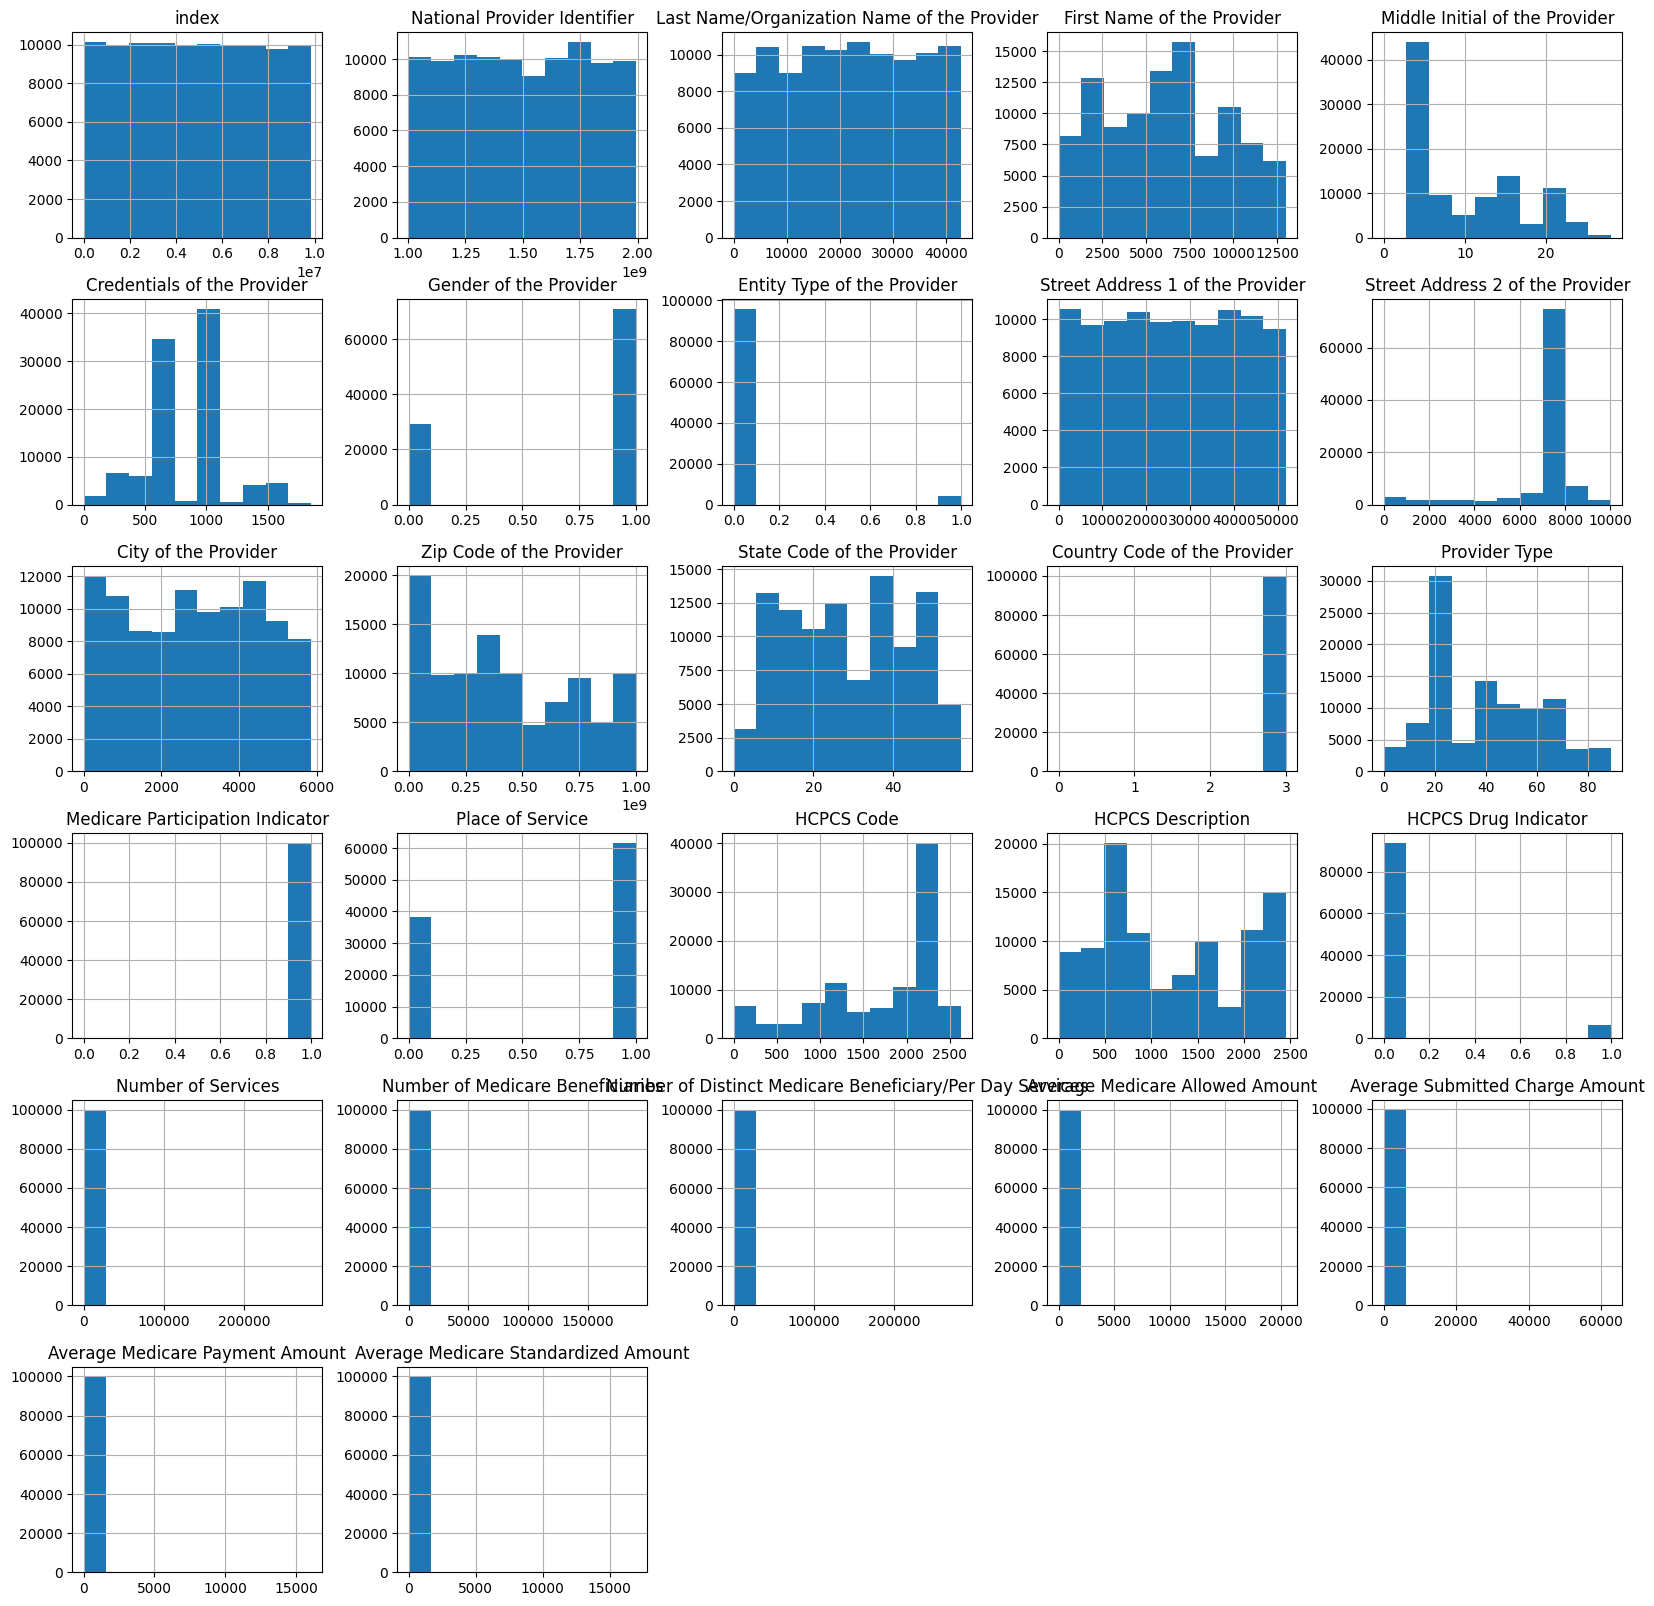

In [ ]:
df.hist(figsize=(20,20))
print()

## Heatmaps

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
index,1.000000,0.999917,0.001382,0.000710,0.001793,0.002898,-0.001892,0.002629,0.001073,0.004480,...,0.000025,0.000856,-0.002766,0.000549,-0.000587,-0.001091,0.000608,0.001189,0.000520,0.001220
National Provider Identifier,0.999917,1.000000,0.001404,0.000968,0.002156,0.002852,-0.000822,0.002545,0.001123,0.004582,...,-0.000131,0.000928,-0.002590,0.000632,-0.000434,-0.000963,0.000632,0.001101,0.000545,0.001253
Last Name/Organization Name of the Provider,0.001382,0.001404,1.000000,0.012971,-0.007622,0.012696,0.006511,0.060530,-0.002146,0.004005,...,0.000166,0.003326,0.031026,0.003012,-0.001362,-0.002578,-0.000928,-0.002201,-0.000255,-0.000503
First Name of the Provider,0.000710,0.000968,0.012971,1.000000,-0.034996,0.002677,0.032676,0.081450,-0.000333,0.001760,...,-0.000532,0.003973,0.015380,0.006915,0.007248,0.006903,0.007790,0.008529,0.008215,0.008484
Middle Initial of the Provider,0.001793,0.002156,-0.007622,-0.034996,1.000000,-0.035739,0.042950,-0.199109,-0.000065,-0.006841,...,-0.028077,0.003097,-0.029287,-0.011696,-0.014769,-0.015224,-0.013233,-0.016815,-0.014694,-0.013503
Credentials of the Provider,0.002898,0.002852,0.012696,0.002677,-0.035739,1.000000,-0.043582,0.097610,-0.005971,0.001193,...,0.080725,0.019188,-0.003521,0.007169,0.006560,0.008313,-0.007303,-0.004931,-0.008170,-0.008354
Gender of the Provider,-0.001892,-0.000822,0.006511,0.032676,0.042950,-0.043582,1.000000,0.135056,0.003848,0.001019,...,-0.090855,0.056761,0.010310,0.016201,0.015522,0.014681,0.050421,0.056844,0.050602,0.052493
Entity Type of the Provider,0.002629,0.002545,0.060530,0.081450,-0.199109,0.097610,0.135056,1.000000,-0.003506,0.034746,...,0.001833,-0.004409,0.172277,0.066191,0.080222,0.077863,0.075645,0.093241,0.082867,0.084562
Street Address 1 of the Provider,0.001073,0.001123,-0.002146,-0.000333,-0.000065,-0.005971,0.003848,-0.003506,1.000000,-0.037942,...,-0.005640,0.005175,-0.002779,-0.000527,-0.003965,-0.003812,0.004661,0.004863,0.004444,0.004825
Street Address 2 of the Provider,0.004480,0.004582,0.004005,0.001760,-0.006841,0.001193,0.001019,0.034746,-0.037942,1.000000,...,0.016090,-0.002984,0.031590,-0.000489,0.003672,0.004661,-0.007867,-0.016898,-0.007332,-0.004063


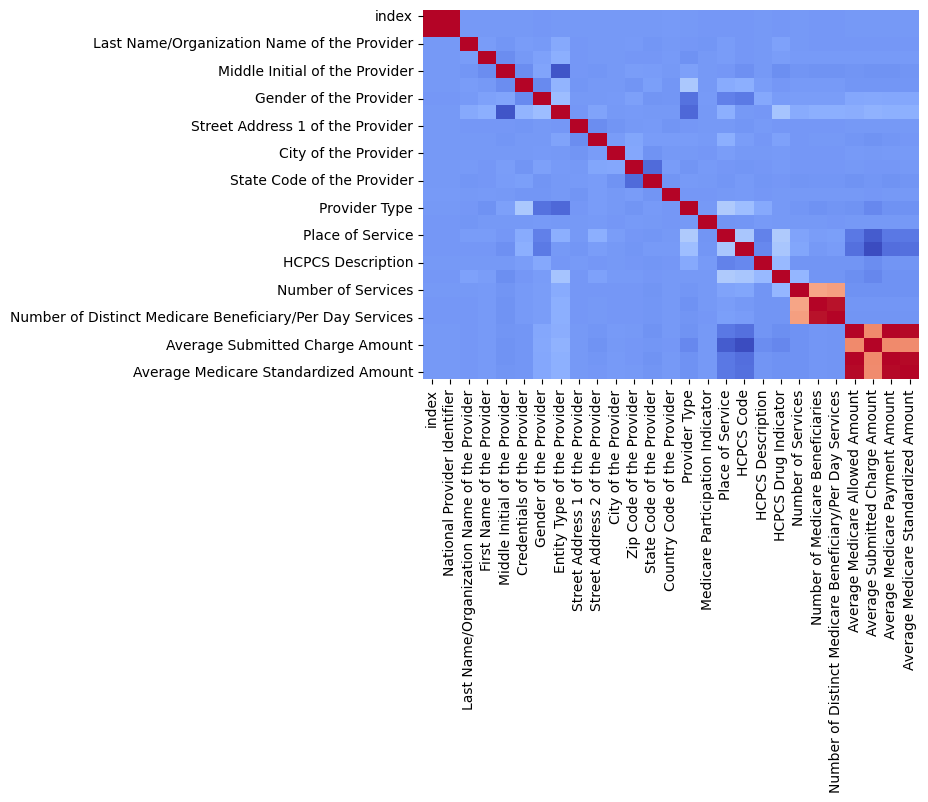

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), cbar=False, cmap='coolwarm')
df.corr()

## Boxplots

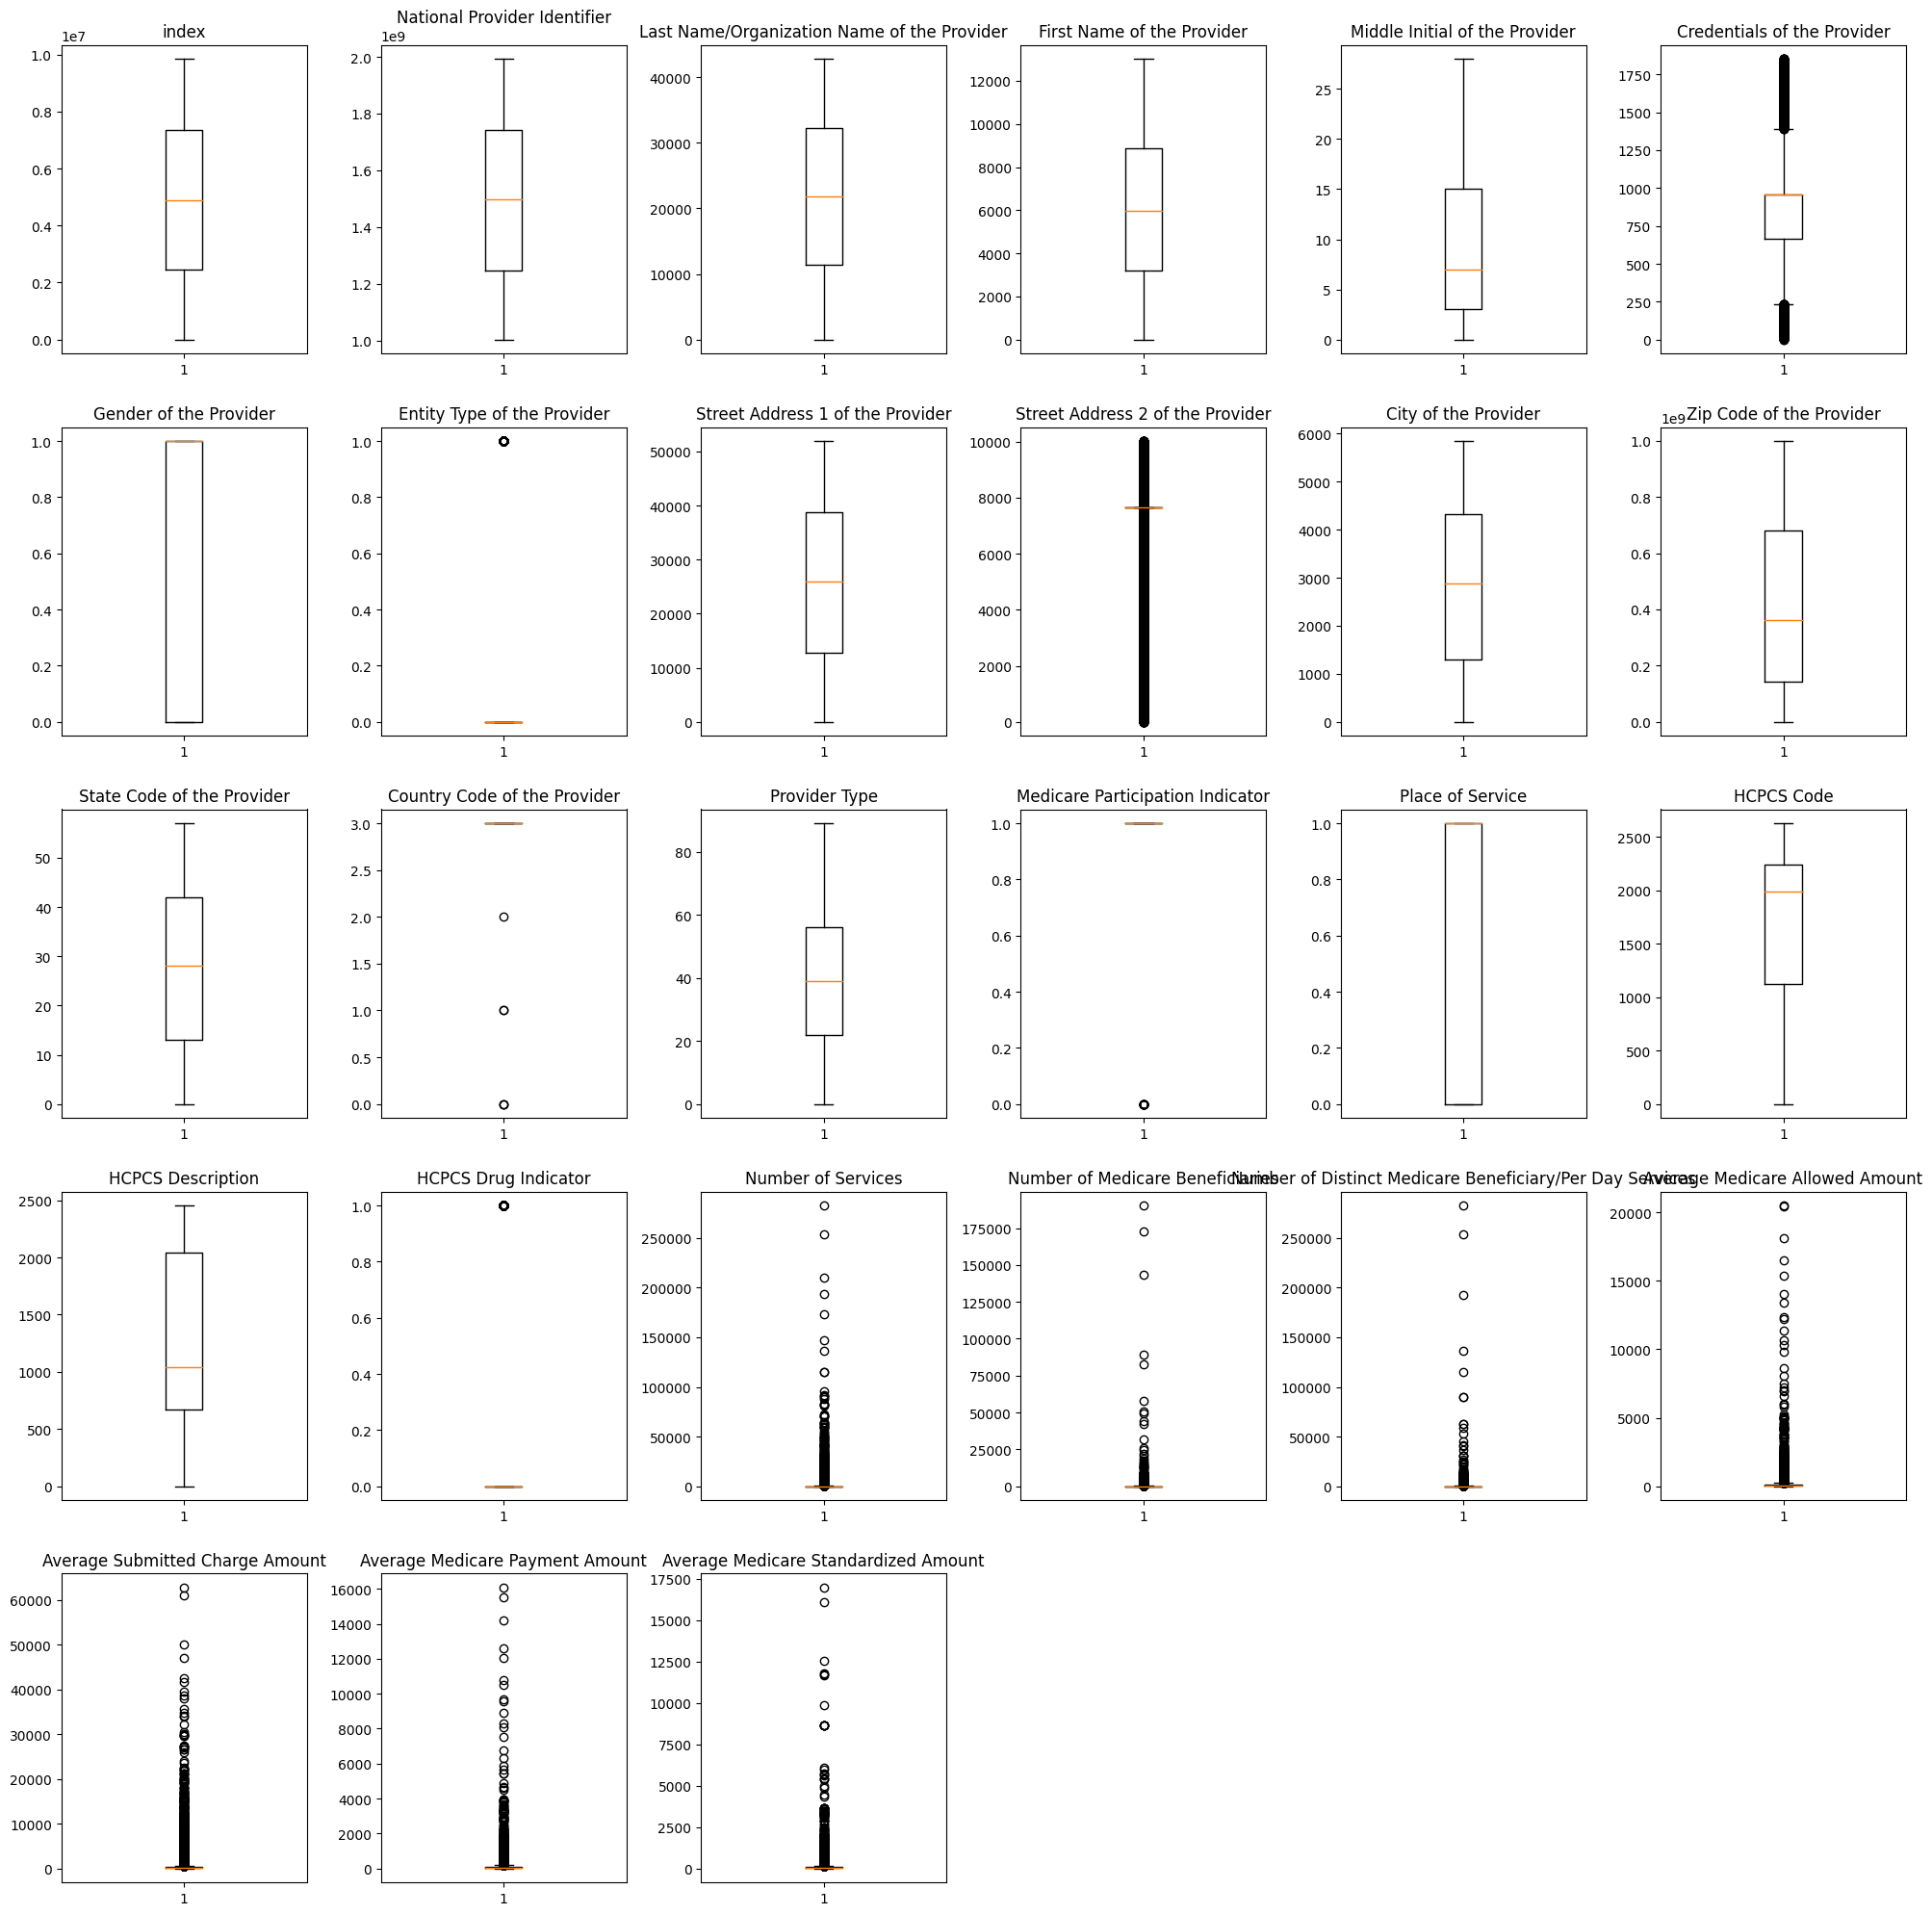

In [ ]:
# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(20, 20))

fig.delaxes(axs[4][5])
fig.delaxes(axs[4][4])
fig.delaxes(axs[4][3])

# Flatten the 2D array of subplots to a 1D array
axs = axs.flatten()



# Loop through each column of the dataframe and plot a boxplot in a subplot
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Dropping unwanted columns based on above analysis

In [ ]:
# Let's drop the unnecessary columns
DropCols = ['index', 'National Provider Identifier','Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider','Street Address 1 of the Provider',
       'Street Address 2 of the Provider','Zip Code of the Provider',"HCPCS Code"]


df.drop(columns=DropCols, inplace=True, axis=1)

# Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
for i in df:
    df[i] = s.fit_transform(df[i].values.reshape(-1, 1))

# Dataset Visualization in 2D with the help of PCA

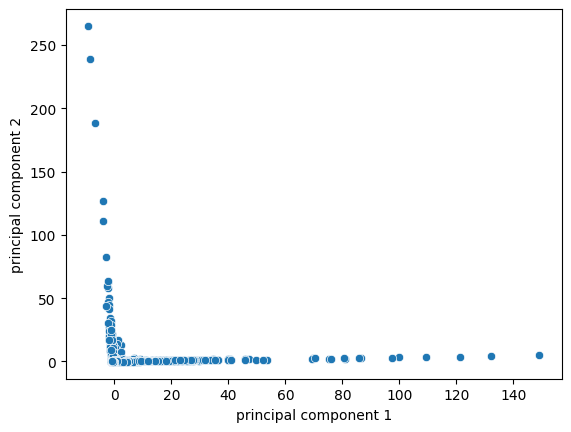

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

transformed_data = pca.fit_transform(df)
principalDf = pd.DataFrame(data = transformed_data, columns = ['principal component 1', 'principal component 2'])

sns.scatterplot(x='principal component 1', y='principal component 2', data=principalDf)
print()

# Nearest Neighbors on PCA-transformed data

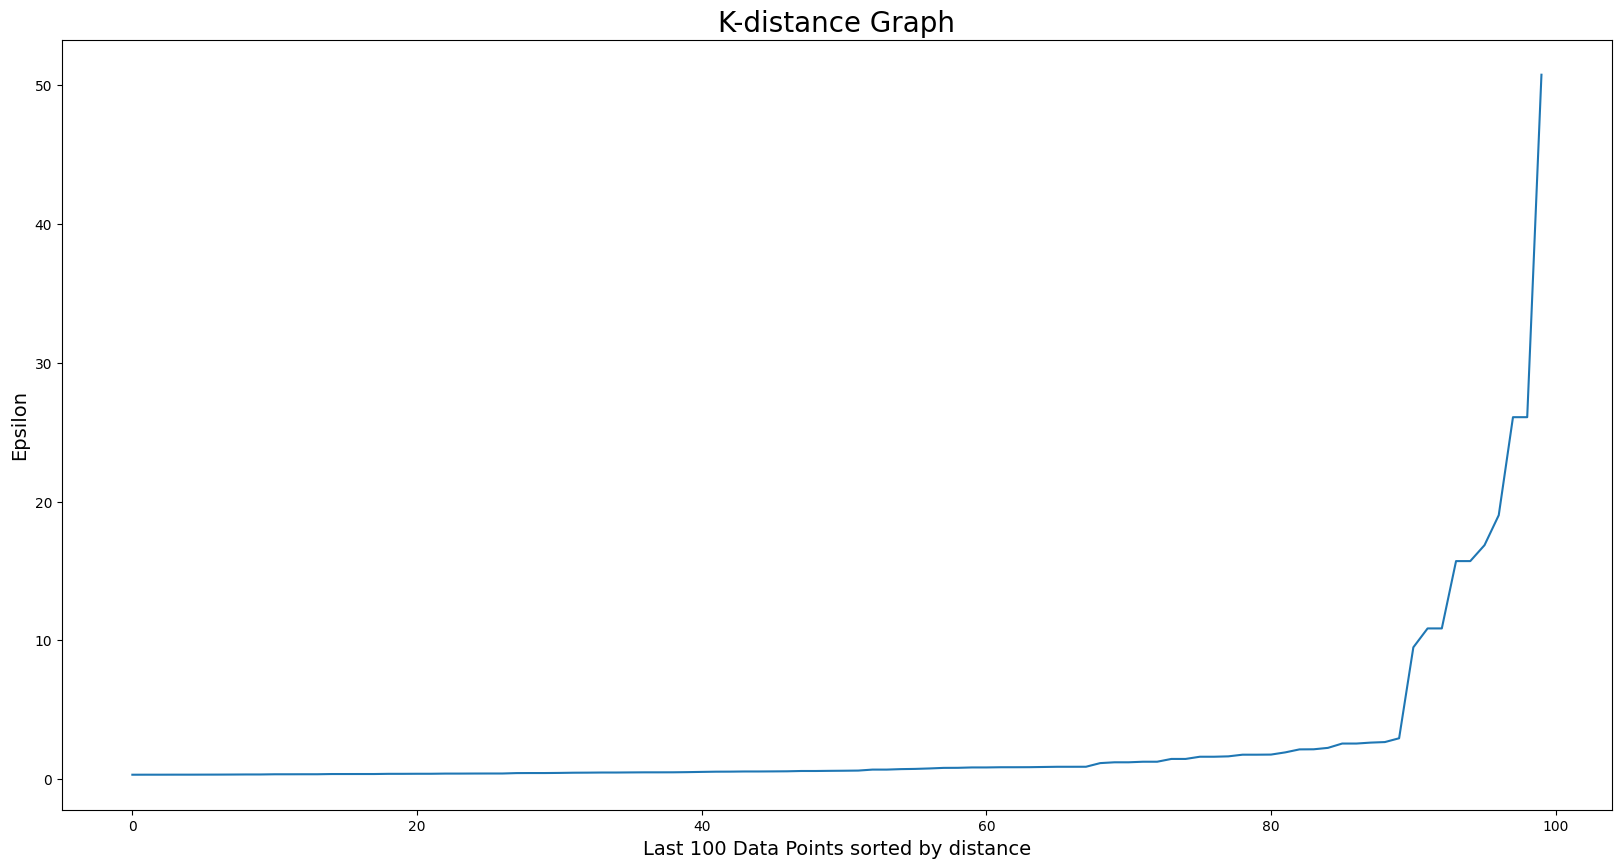

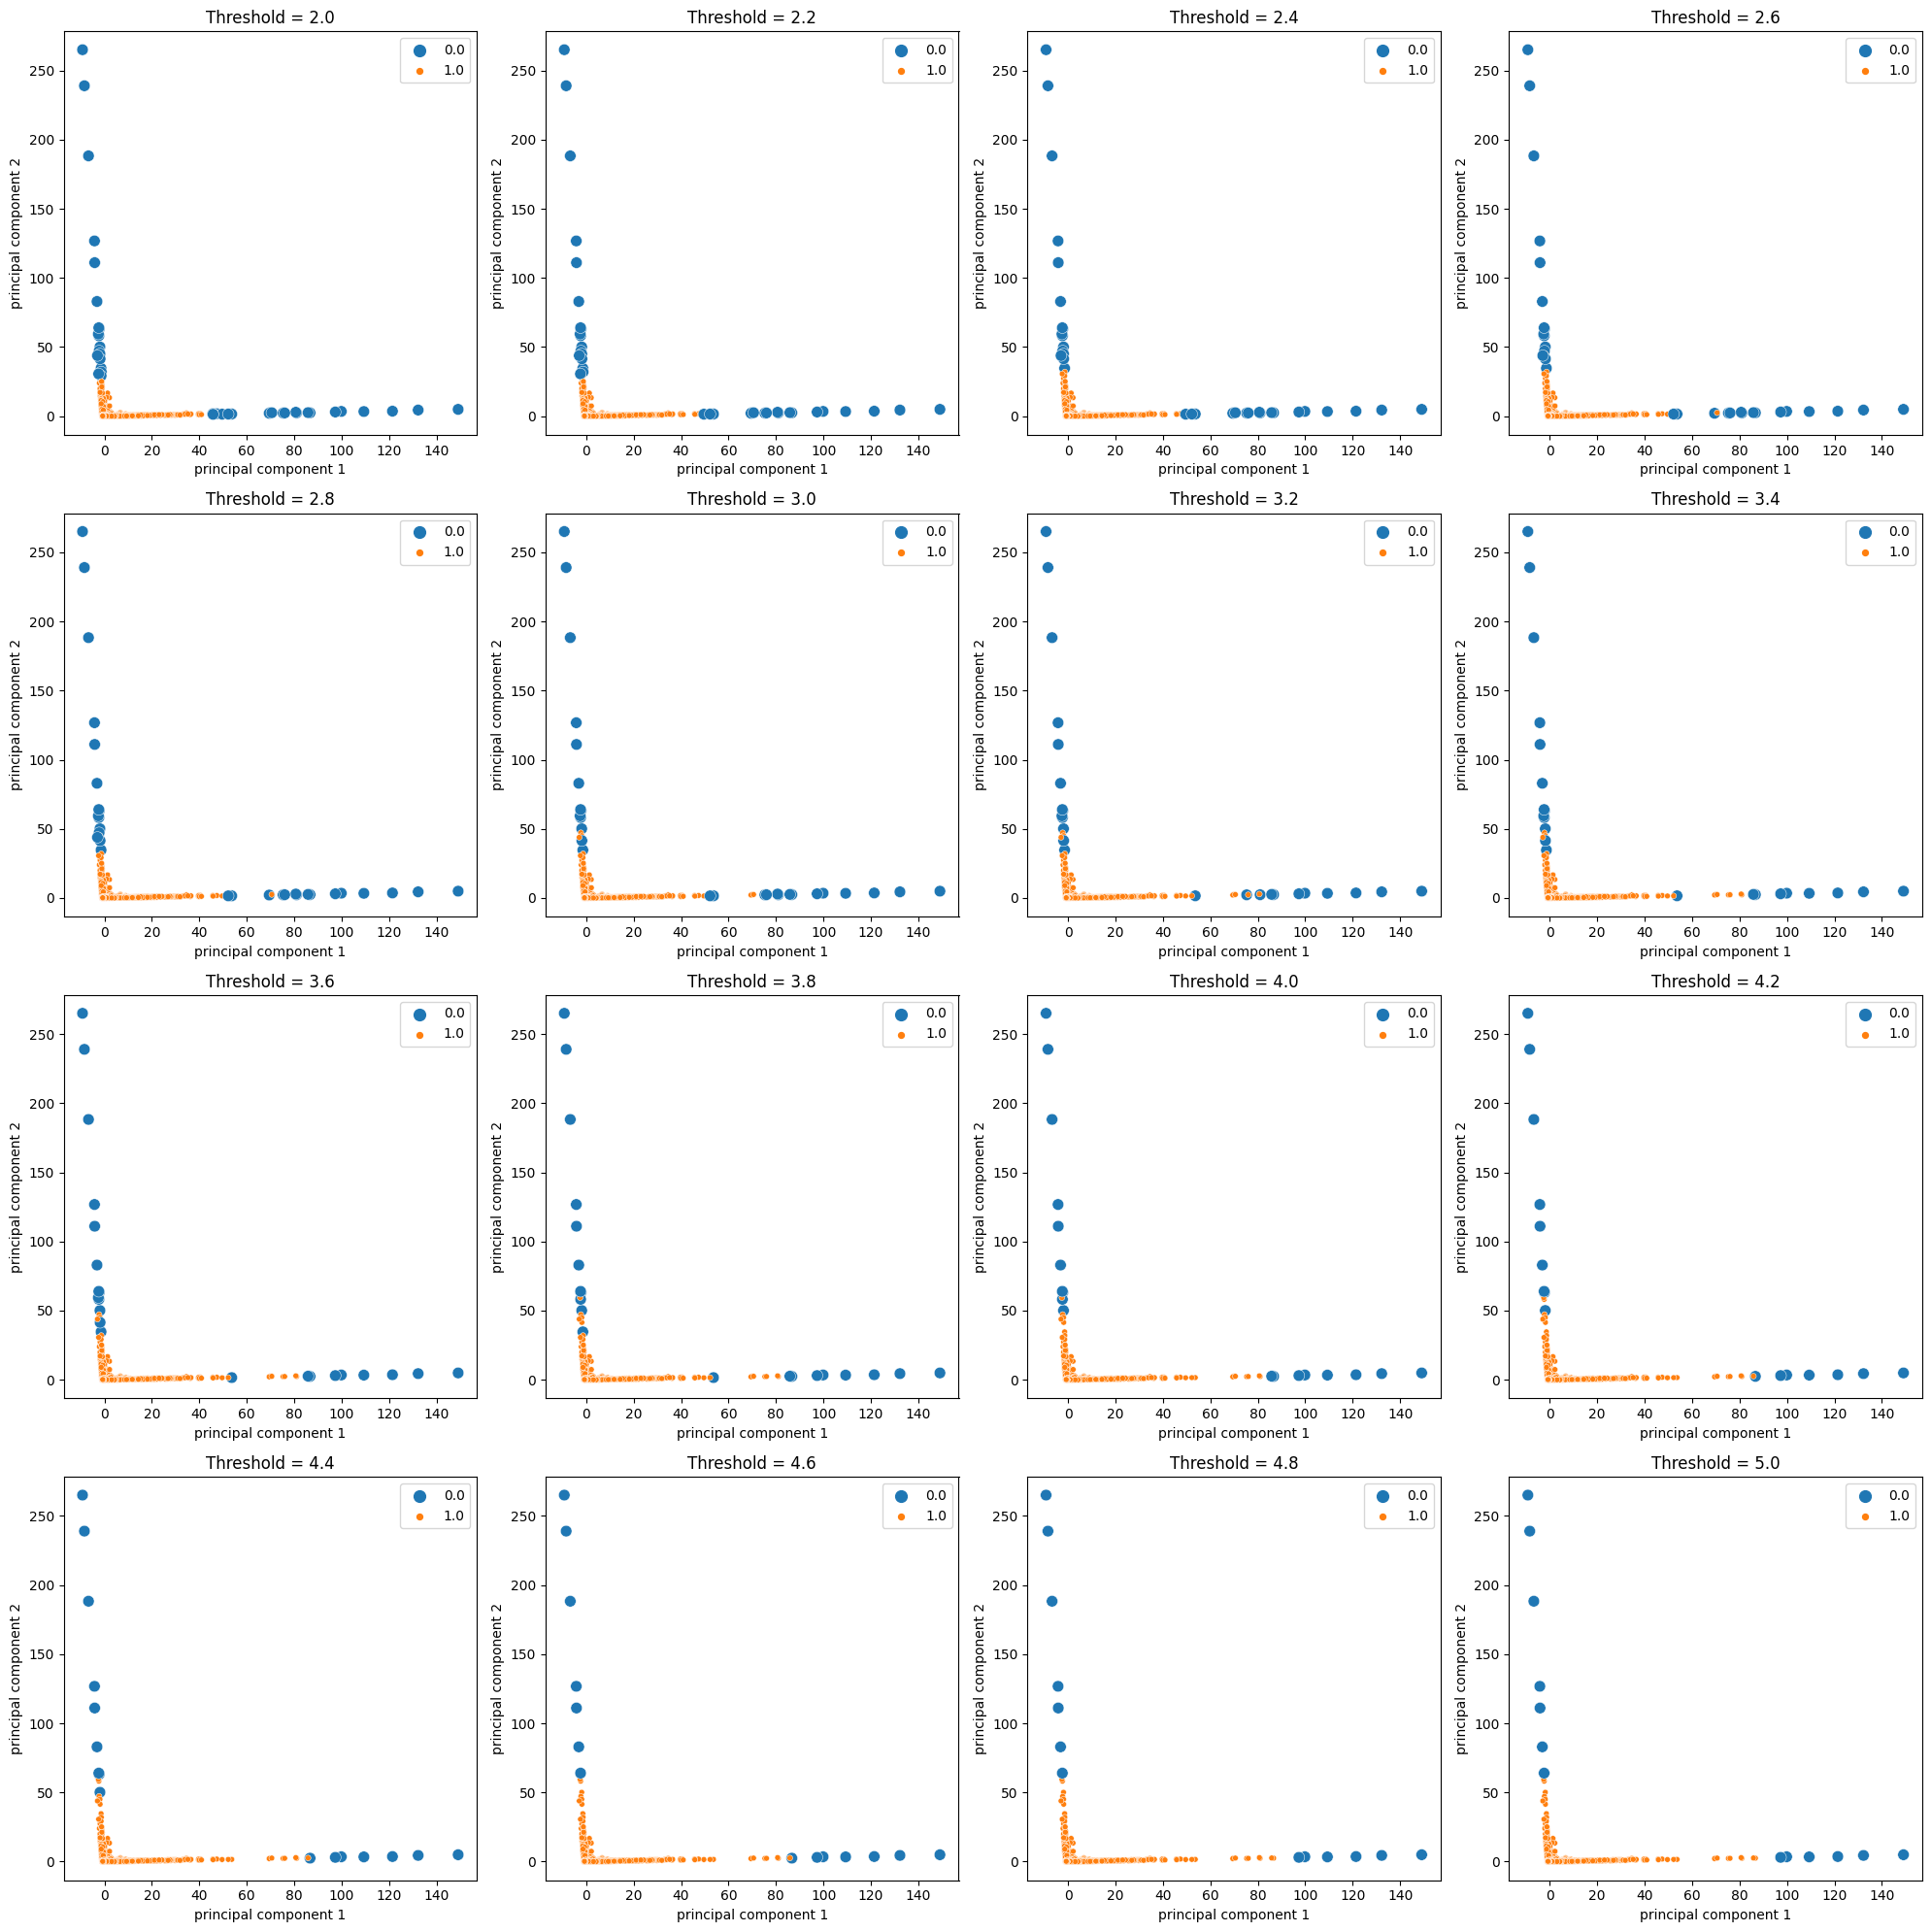

In [ ]:
from sklearn.neighbors import NearestNeighbors


# Define the number of nearest neighbors
n_neighbors = 5

# Train the KNN model
knn = NearestNeighbors(n_neighbors=n_neighbors)
knn.fit(transformed_data)

# Find the distance and index of the k-nearest neighbors for each data point
distances, indices = knn.kneighbors(transformed_data)

# Calculate the anomaly score for each data point
anomaly_scores = np.mean(distances, axis=1)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[99900:, 1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Last 100 Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten the 2D array of subplots to a 1D array
axs = axs.flatten()
c = 0
for i in range(20, 51, 2):

  # Find the data points with the highest anomaly scores
  anomaly_indices = np.where(anomaly_scores>(i/10))

  # Set the detected anomalies to 0 and others to 1
  new_labels = np.ones((100000))
  new_labels[anomaly_indices] = 0

  sns.scatterplot(ax=axs[c], 
                  x='principal component 1', y='principal component 2', 
                  hue=new_labels, data=principalDf, 
                  size=new_labels)
  

  axs[c].set_title("Threshold = " + str(i/10))
  c += 1

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Nearest Neighbors on Original Data i.e. 18 dimensions

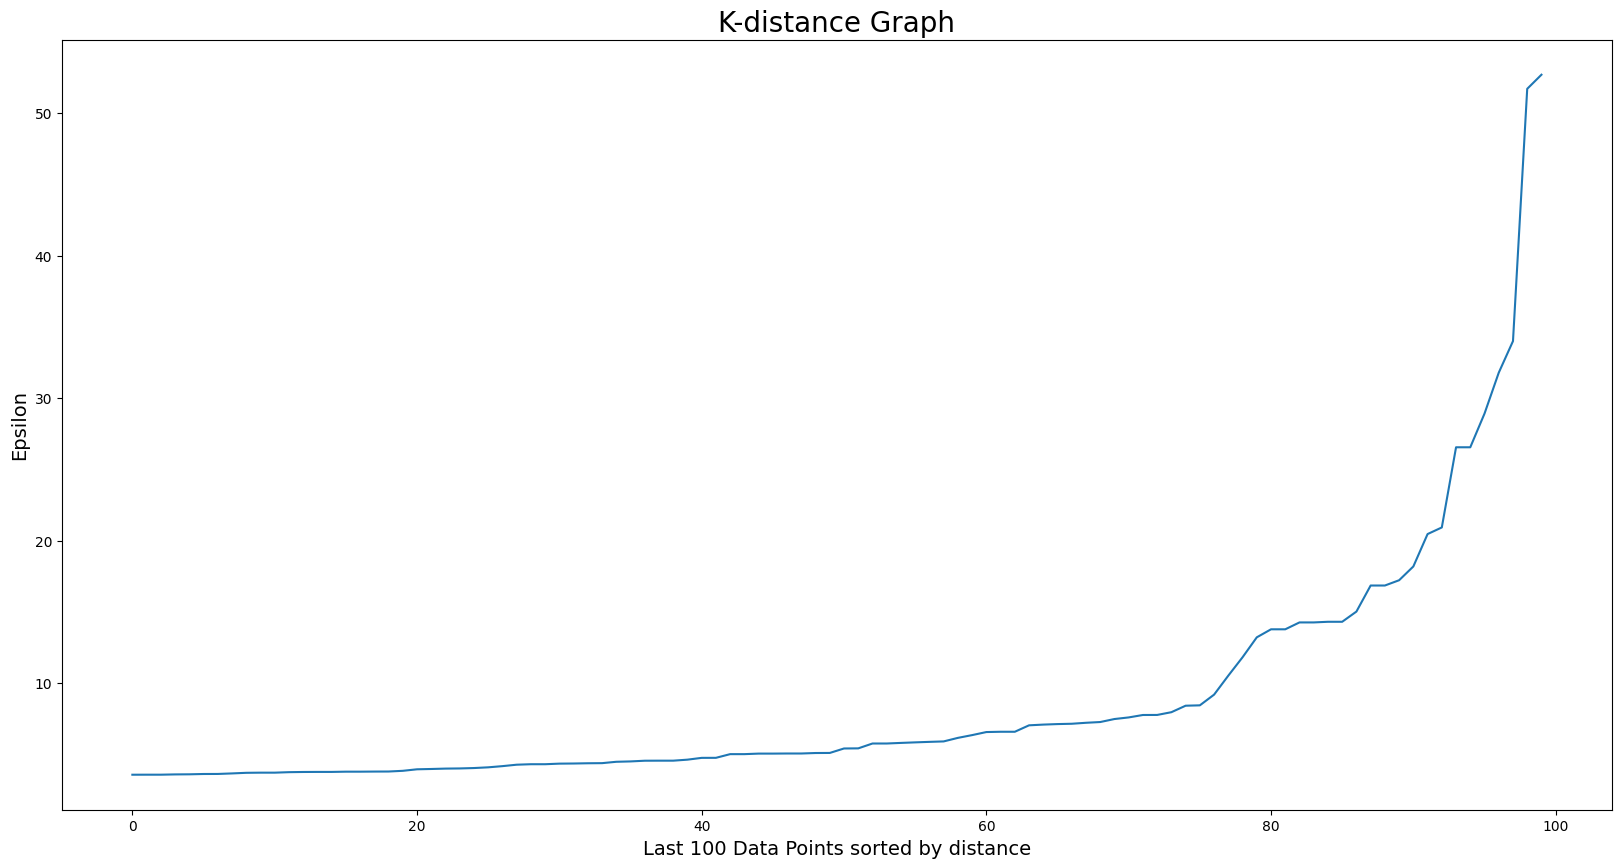

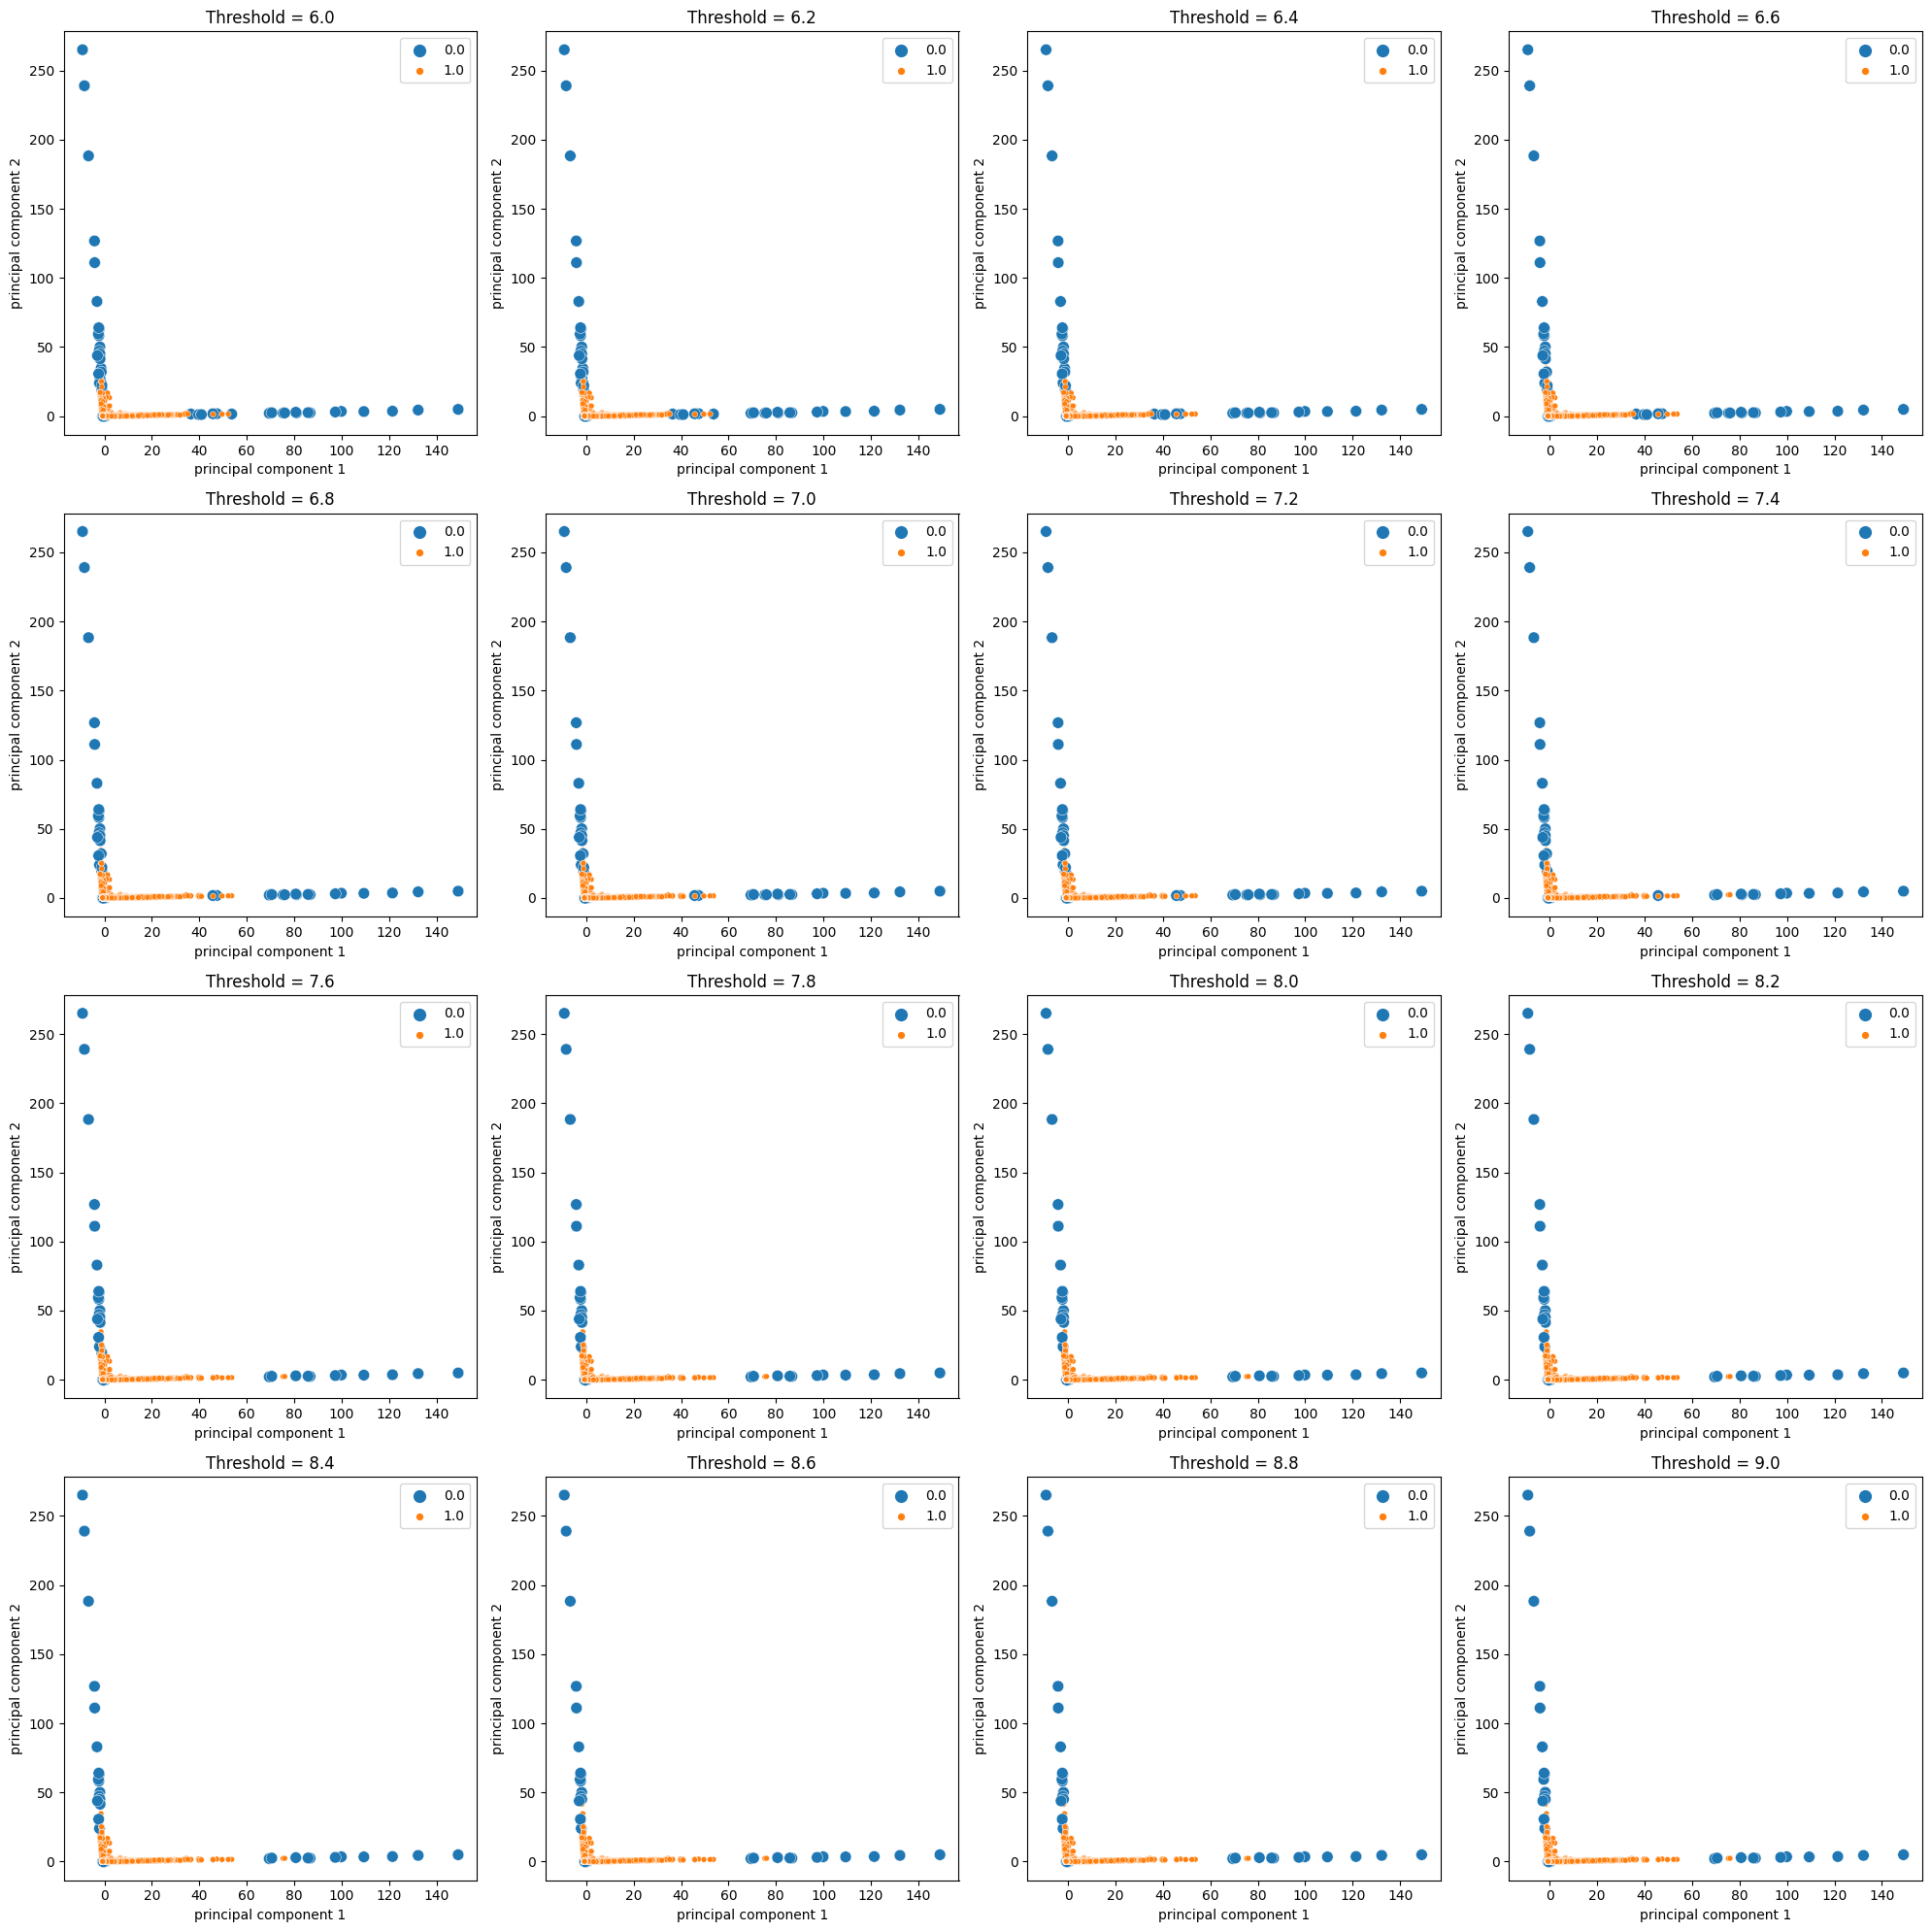

In [ ]:
from sklearn.neighbors import NearestNeighbors


# Define the number of nearest neighbors
n_neighbors = 5

# Train the KNN model
knn = NearestNeighbors(n_neighbors=n_neighbors)
knn.fit(df)

# Find the distance and index of the k-nearest neighbors for each data point
distances, indices = knn.kneighbors(df)

# Calculate the anomaly score for each data point
anomaly_scores = np.mean(distances, axis=1)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[99900:, 1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Last 100 Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten the 2D array of subplots to a 1D array
axs = axs.flatten()

c = 0

for i in range(60, 91, 2):

  # Find the data points with the highest anomaly scores
  anomaly_indices = np.where(anomaly_scores>(i/10))

  # Set the detected anomalies to 0 and others to 1
  new_labels = np.ones((100000))
  new_labels[anomaly_indices] = 0

  sns.scatterplot(ax=axs[c], 
                  x='principal component 1', y='principal component 2', 
                  hue=new_labels, data=principalDf, 
                  size=new_labels)
  

  axs[c].set_title("Threshold = " + str(i/10))
  c += 1

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# DBSCAN on PCA-transformed Data

As known already, DBSCAN is very sensitive to hyperparameters, which includes `epsilon` and `min_samples`. It cannot handle high `epsilon` values as it leads to an extraordinarily high time complexity. The data required a high value of `epsilon` for good results. Also, on trying lower values, results were found to be below par, as demonstrated below. Hence, it can be safely concluded that DBSCAN is not a good choice for this data.

In [27]:
from sklearn.cluster import DBSCAN

# # Drop non-numeric columns and select relevant features for clustering
# X = df.select_dtypes(include=['int64', 'float64']).iloc[:, 11:]

# Fit DBSCAN model
dbscan = DBSCAN(eps=0.03, min_samples=20)
dbscan.fit(transformed_data)

# Identify anomalies
anomalies = transformed_data[dbscan.labels_ == -1]

print(f"Number of anomalies detected: {len(anomalies)}")


Number of anomalies detected: 6855


# Isolation Forest on PCA-transformed Dataset

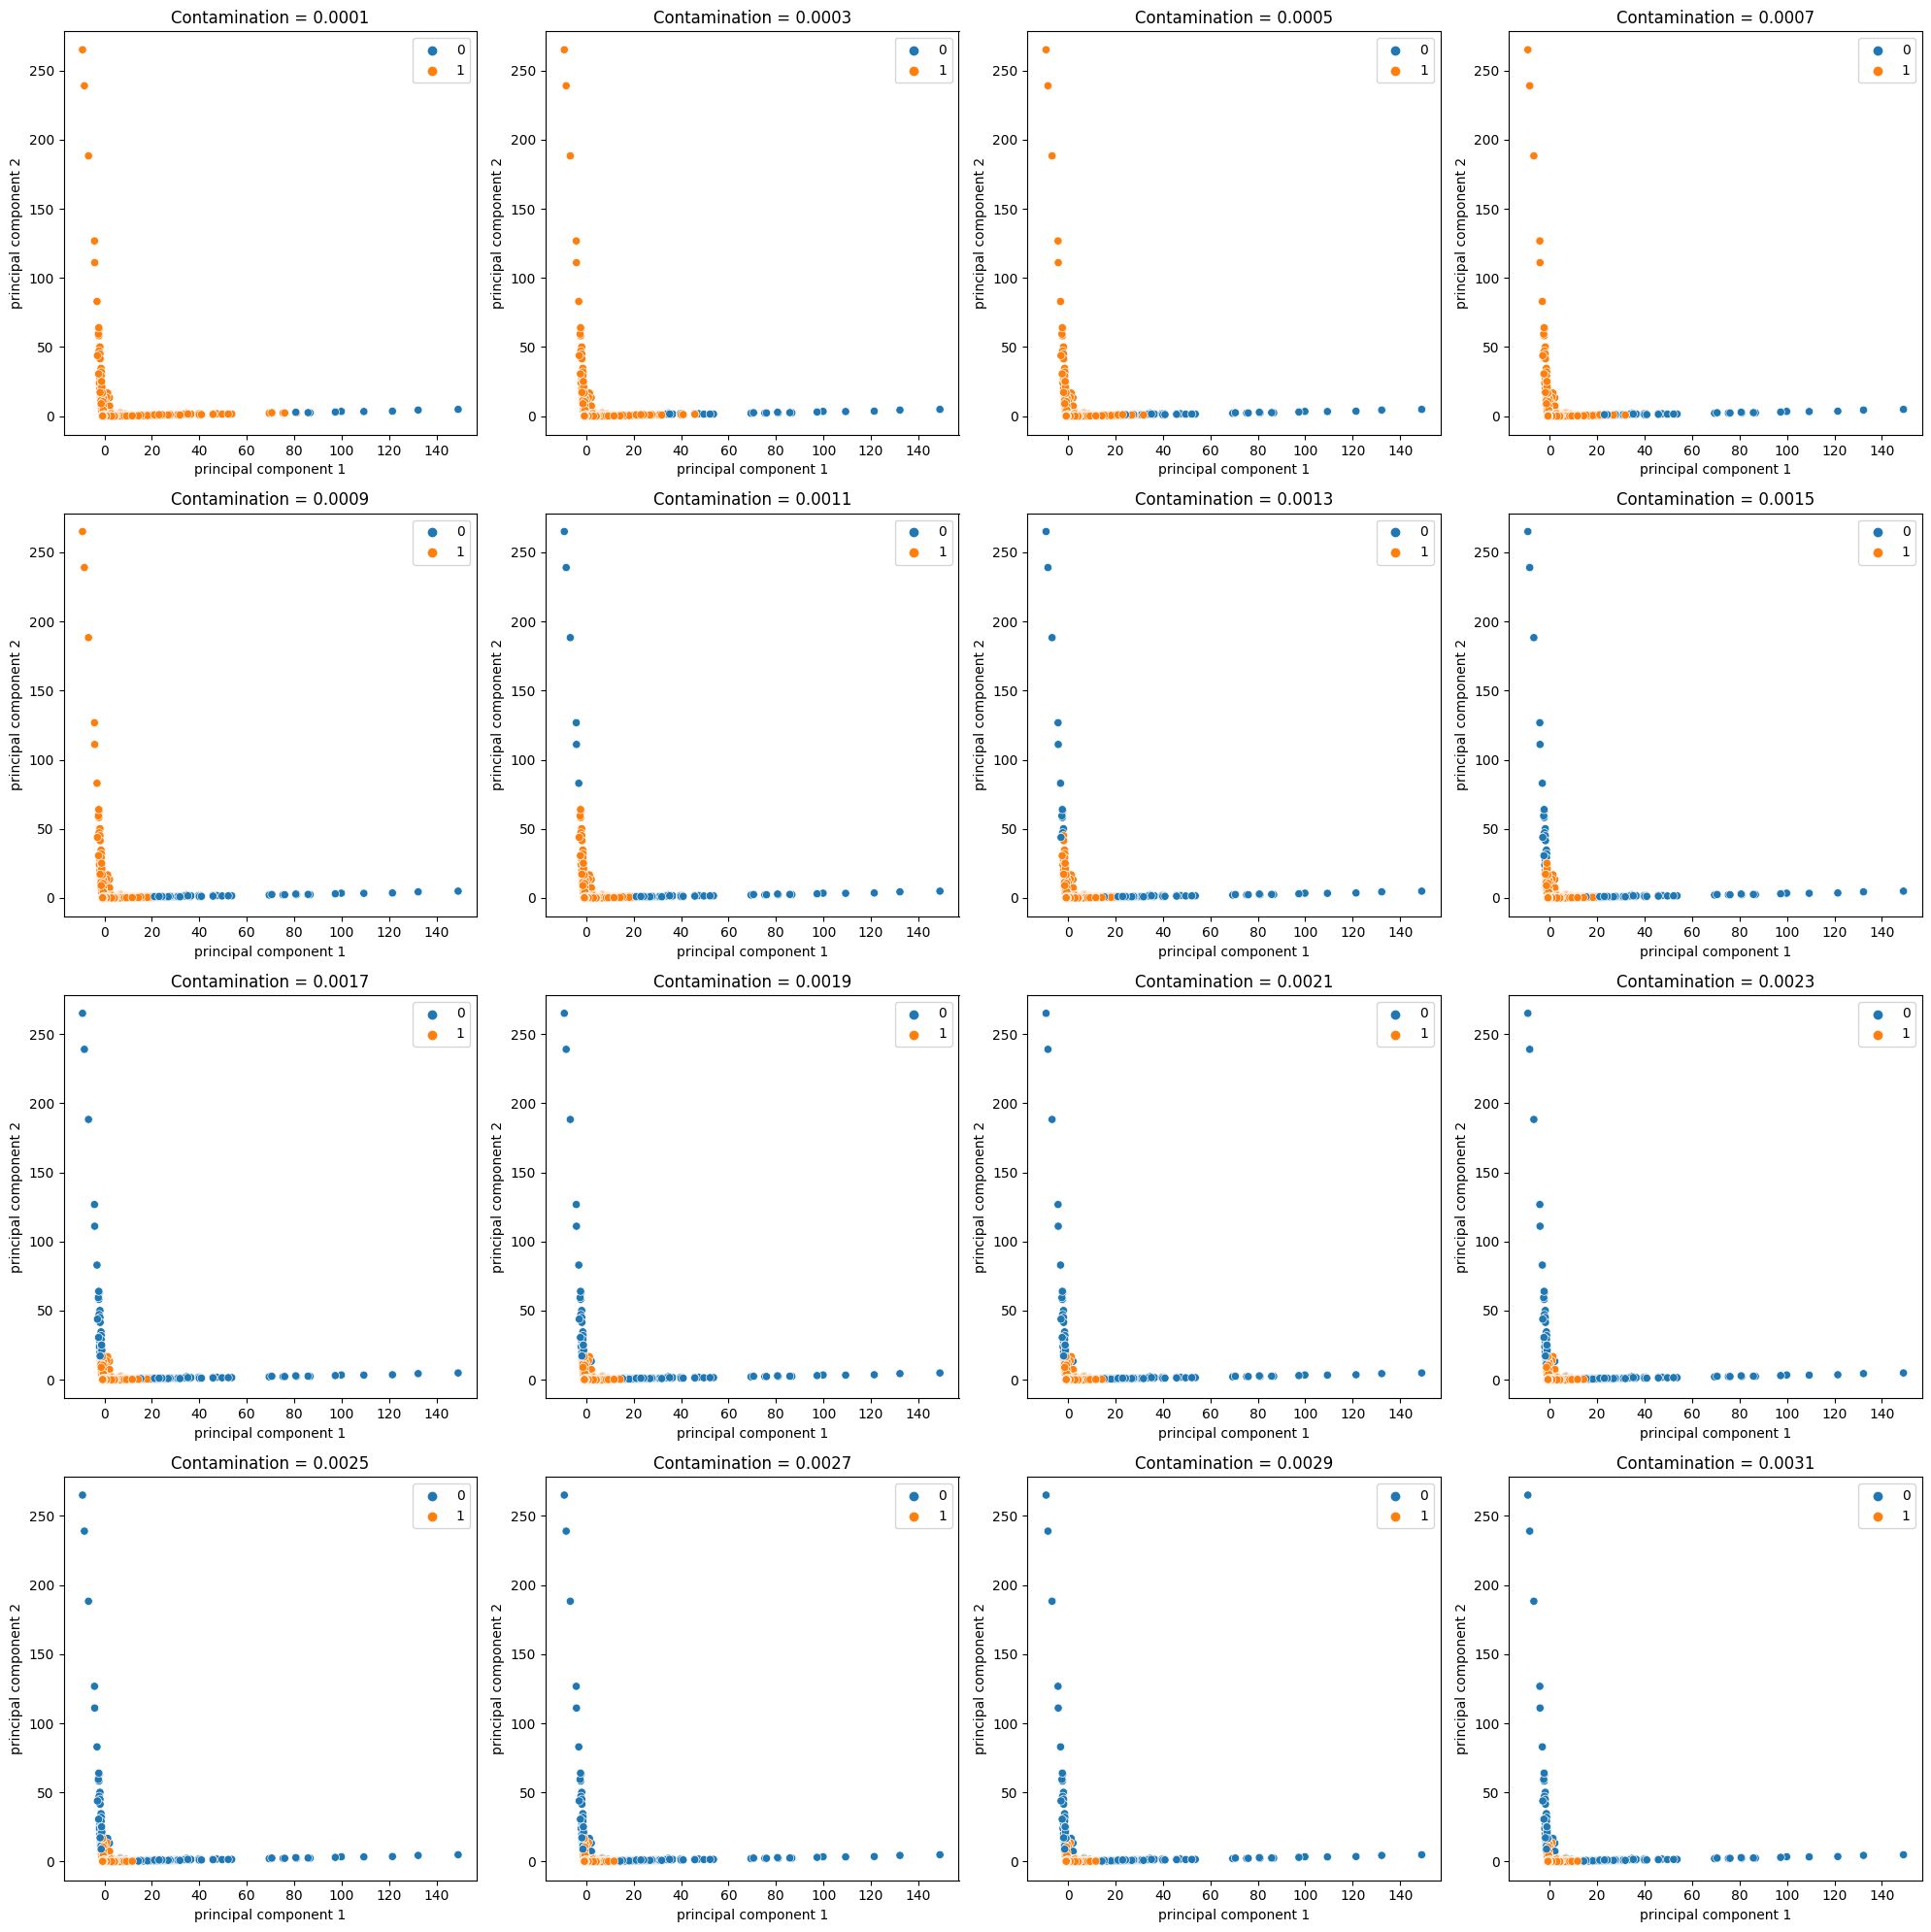

In [ ]:
from sklearn.ensemble import IsolationForest

# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten the 2D array of subplots to a 1D array
axs = axs.flatten()

c = 0

for i in range(1, 32, 2):
  model = IsolationForest(n_estimators=300, max_samples='auto', 
                        contamination=i/10000, max_features=1.0, bootstrap=False, n_jobs=None, 
                        warm_start=False, random_state=2020)
  model.fit(transformed_data)
  Y = model.predict(transformed_data)
  Y[Y == 1] = 1
  Y[Y == -1] = 0
  plt.title('Sample Distribution on First 2 PCAs by Class Color')
  # plt.scatter(x='principal component 1', y='principal component 2', alpha = .6, c=Y)


  sns.scatterplot(ax=axs[c], 
                  x='principal component 1', 
                  y='principal component 2', 
                  hue=Y, 
                  data=principalDf)
  axs[c].set_title("Contamination = " + str(i/10000))
  c += 1


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Isolation Forest on original data i.e. 18 dimensions

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but I

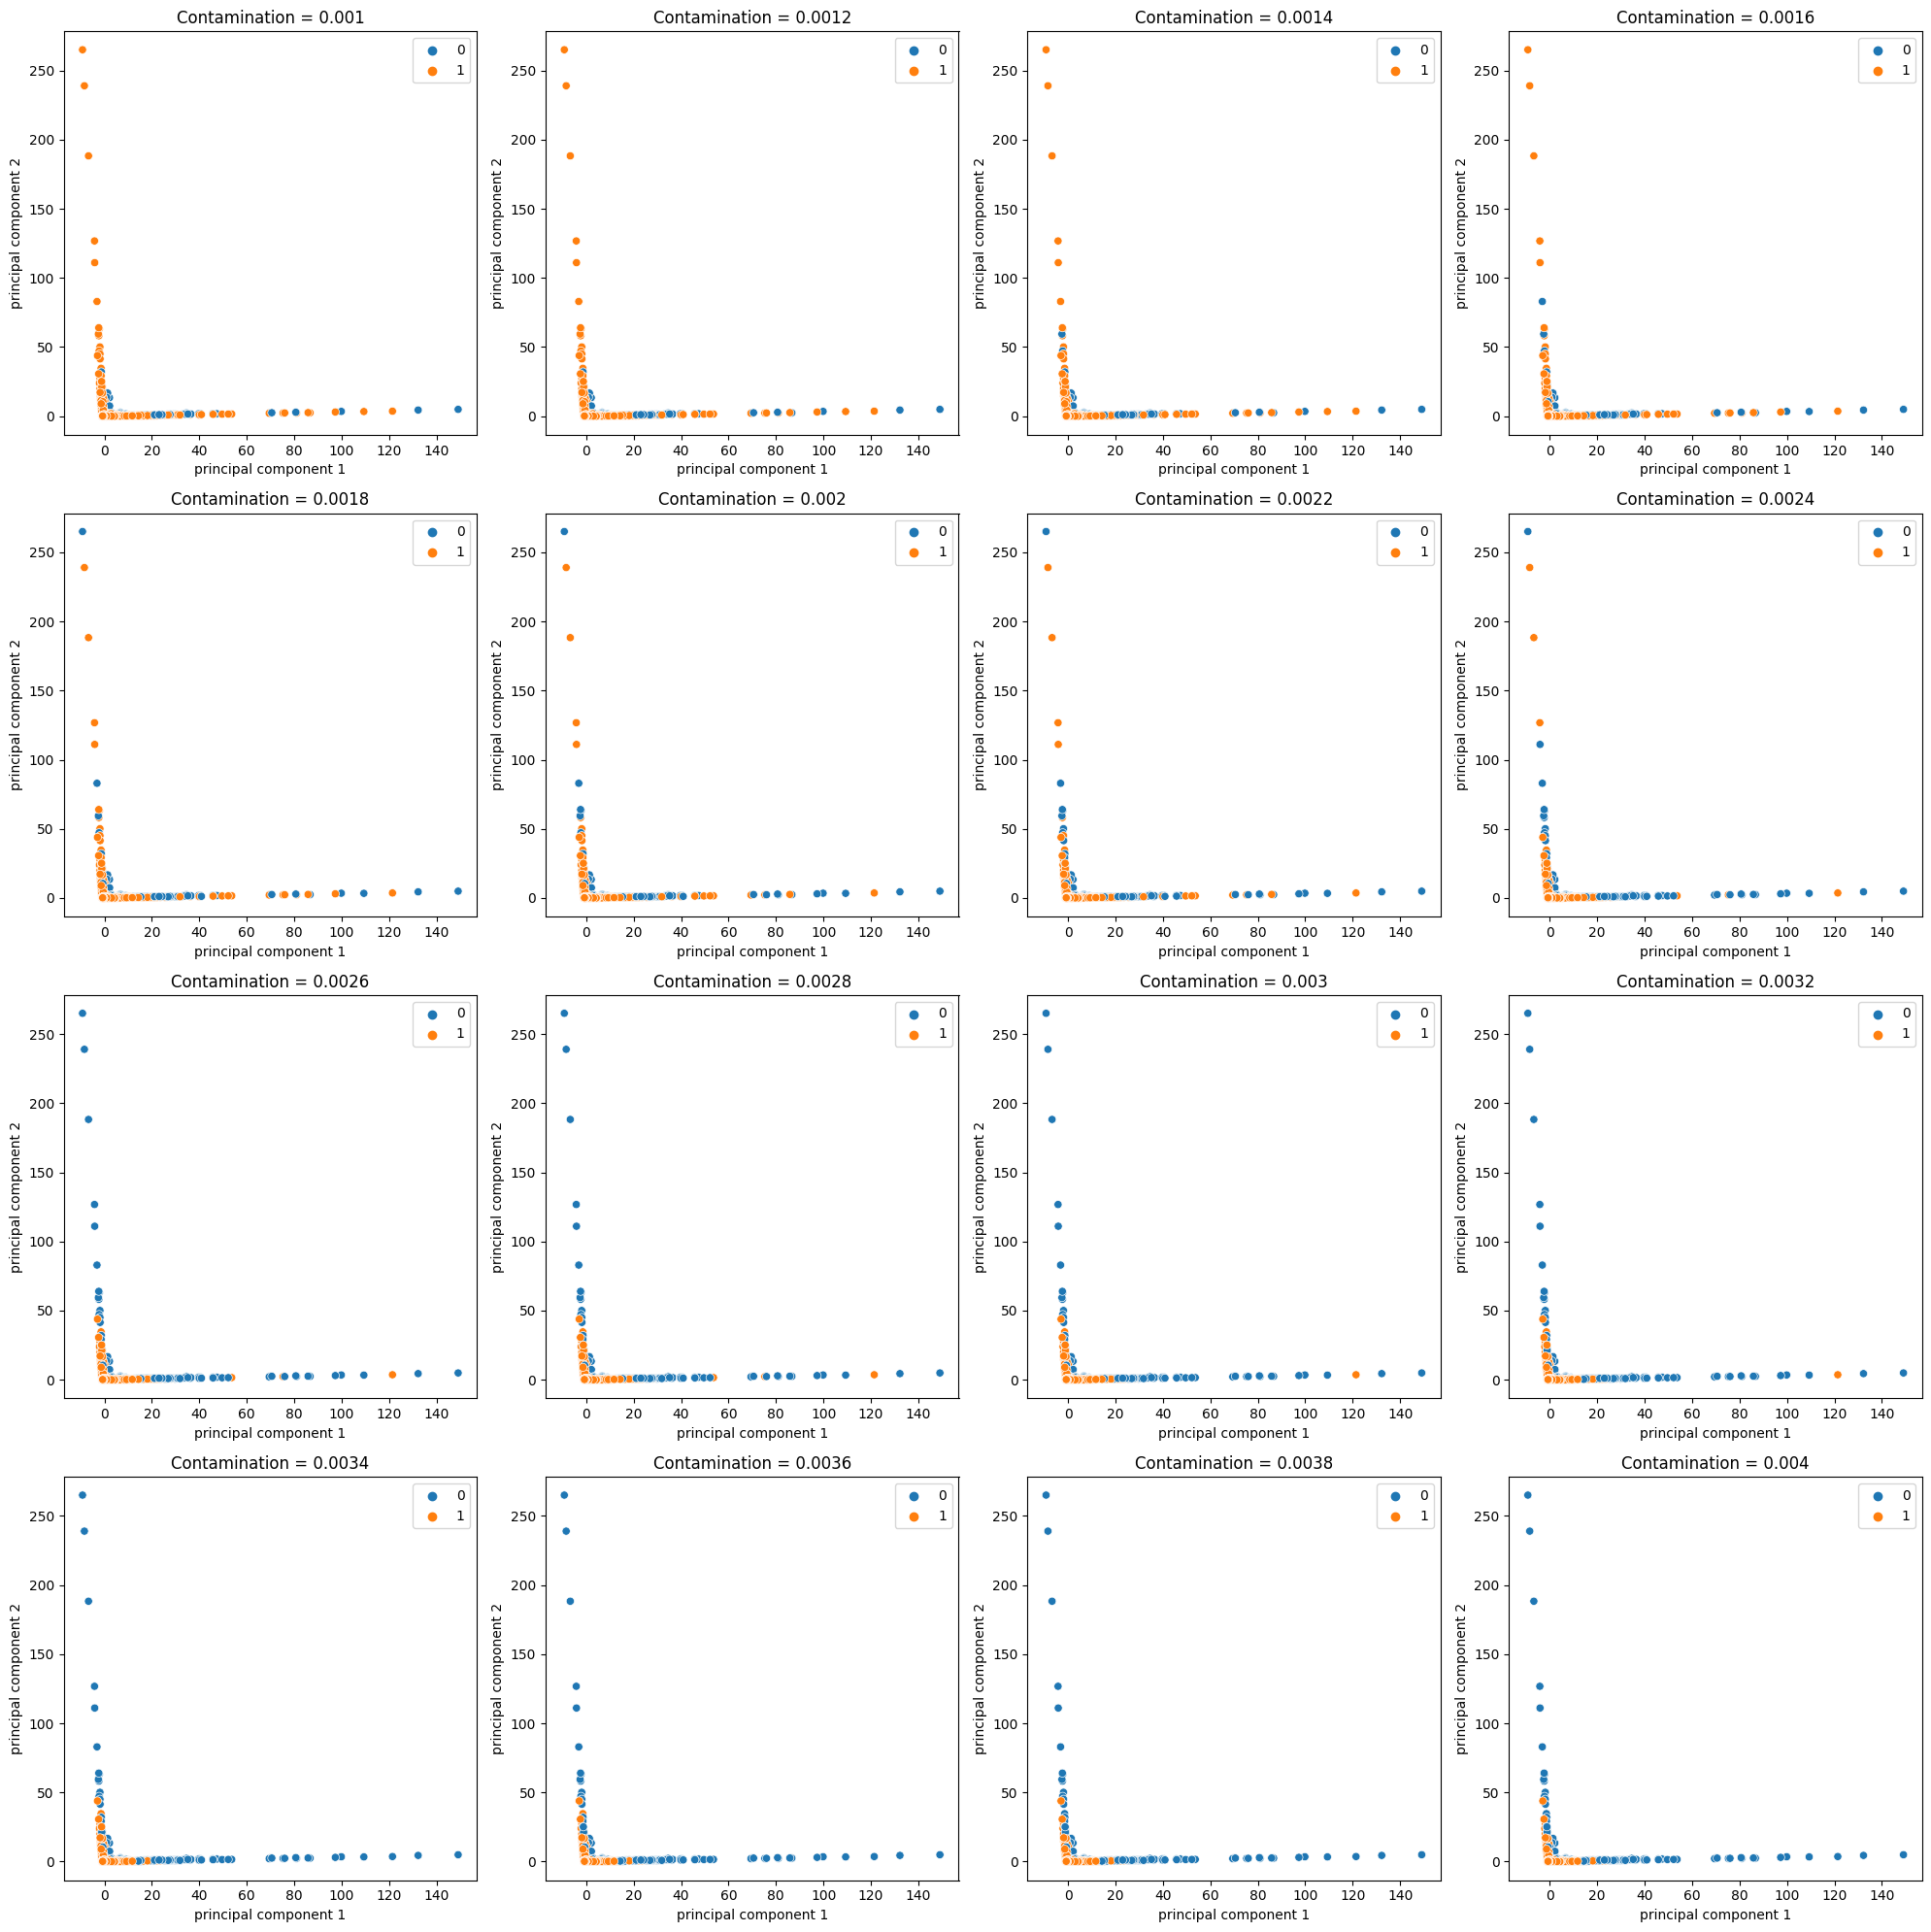

In [ ]:
from sklearn.ensemble import IsolationForest

# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten the 2D array of subplots to a 1D array
axs = axs.flatten()

c = 0
for i in range(10, 41, 2):
  model = IsolationForest(n_estimators=300, max_samples='auto', 
                        contamination=i/10000, max_features=1.0, bootstrap=False, n_jobs=None, 
                        warm_start=False, random_state=2020)
  model.fit(df)
  Y = model.predict(df)
  Y[Y == 1] = 1
  Y[Y == -1] = 0
  plt.title('Sample Distribution on First 2 PCAs by Class Color')
  # plt.scatter(x='principal component 1', y='principal component 2', alpha = .6, c=Y)
  sns.scatterplot(ax=axs[c], 
                  x='principal component 1', 
                  y='principal component 2', 
                  hue=Y, 
                  data=principalDf)
  axs[c].set_title("Contamination = " + str(i/10000))
  c += 1


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Local Outlier Factor on PCA-transformed dataset

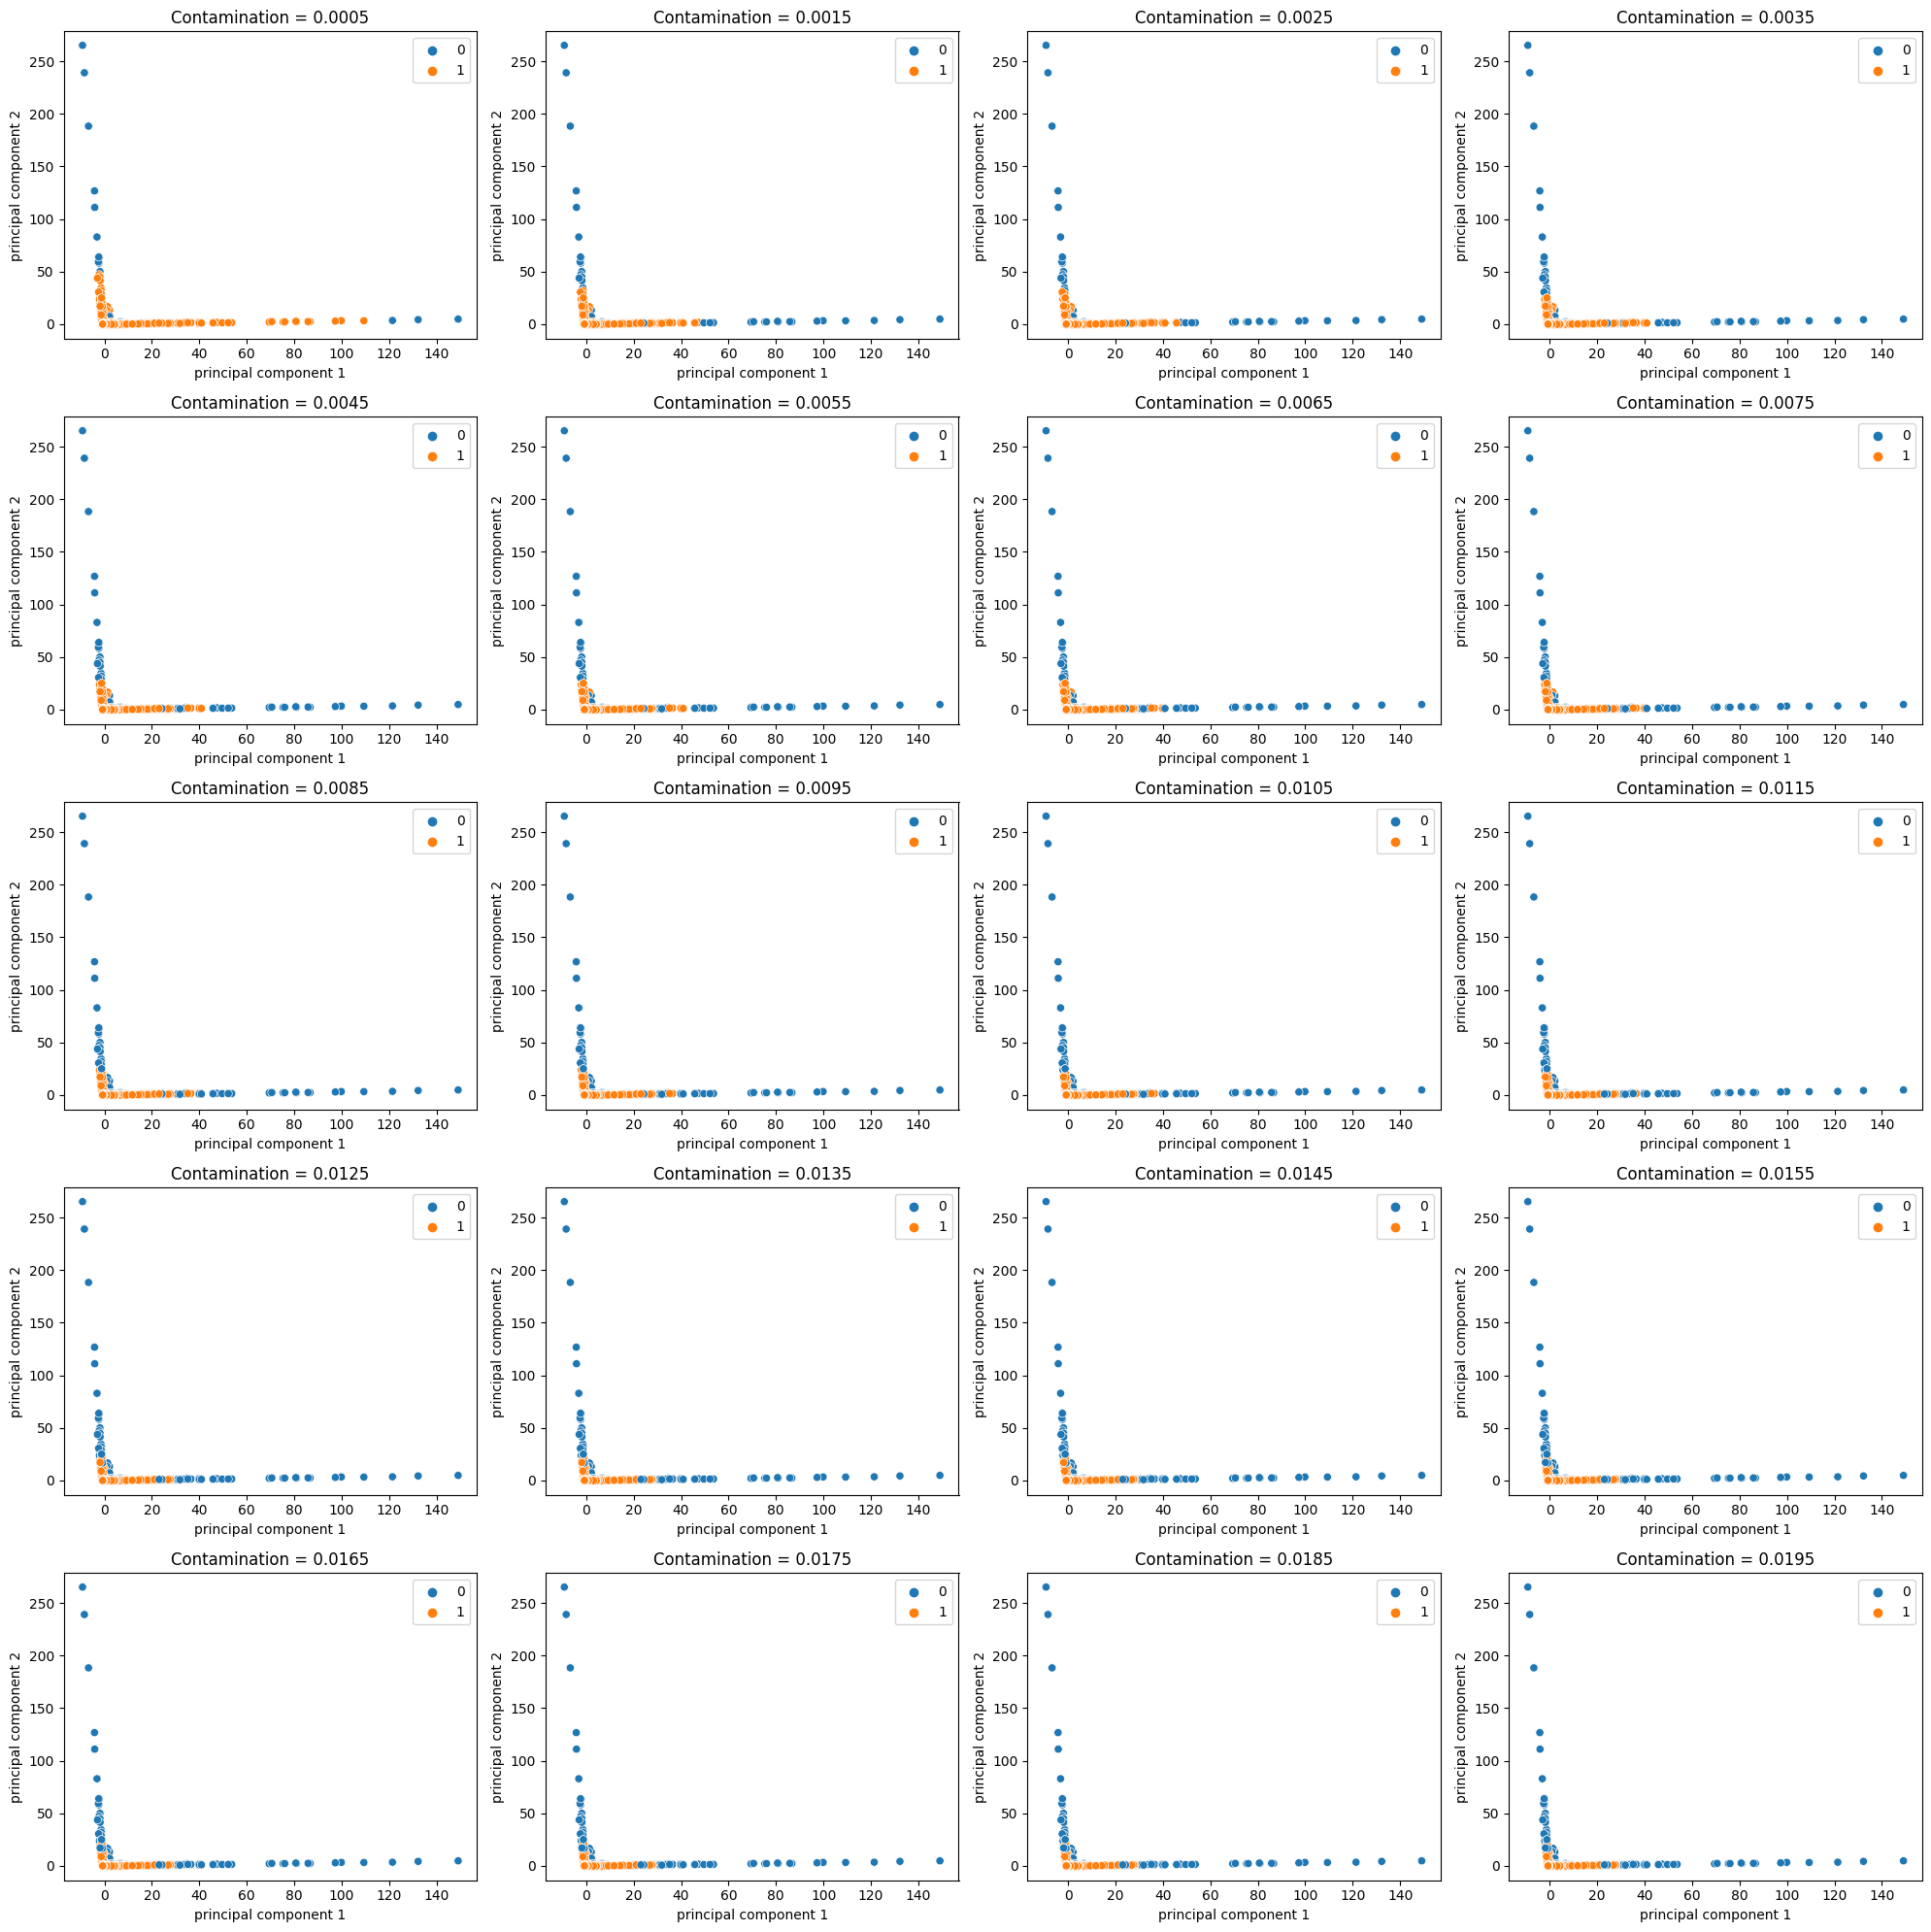

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Flatten the 2D array of subplots to a 1D array
axs = axs.flatten()

c = 0
for i in range(5, 200, 10):
  
  lof = LocalOutlierFactor(n_neighbors=20, contamination=i/10000)
  Y = lof.fit_predict(transformed_data)
  Y[Y == 1] = 1
  Y[Y == -1] = 0

  plt.title('Sample Distribution on First 2 PCAs by Class Color')
  sns.scatterplot(ax=axs[c],
                  x='principal component 1',
                  y='principal component 2',
                  hue=Y,
                  data=principalDf)
  axs[c].set_title("Contamination = " + str(i/10000))
  c += 1


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Local Outlier Factor on original dataset i.e. 18 dimensions

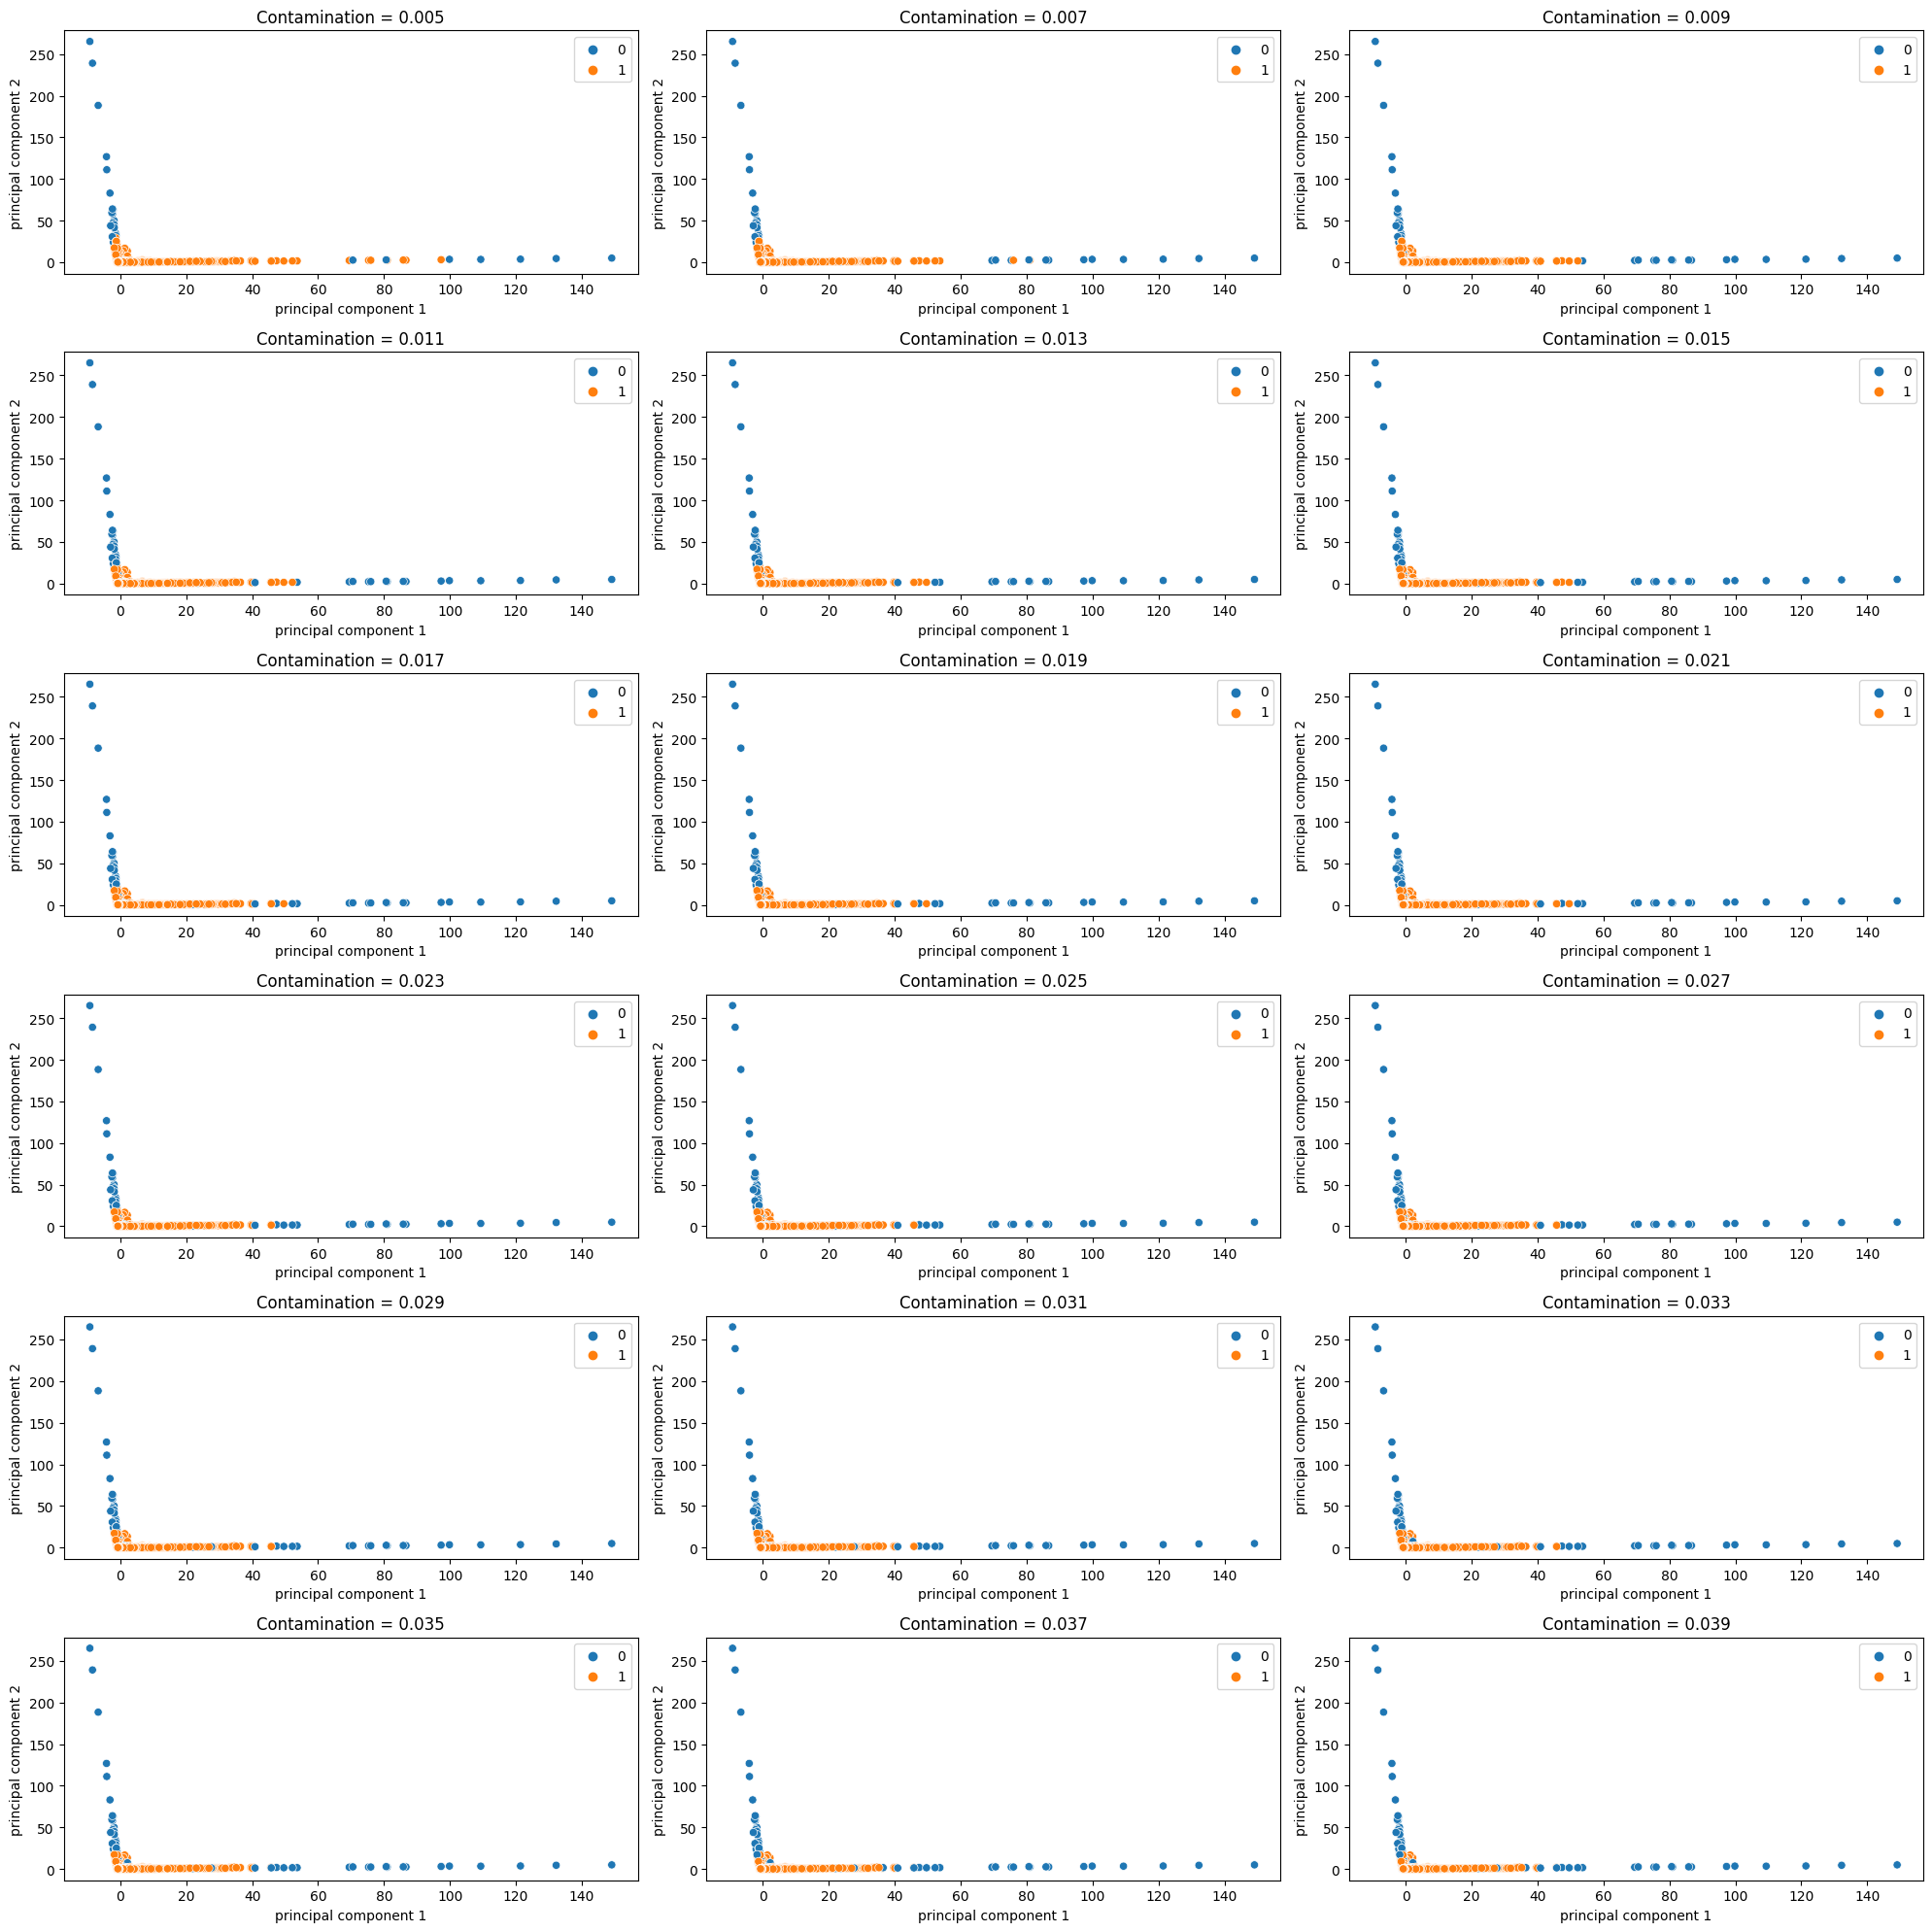

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))

# Flatten the 2D array of subplots to a 1D array
axs = axs.flatten()

c = 0
for i in range(50, 400, 20):
  
  lof = LocalOutlierFactor(n_neighbors=20, contamination=i/10000)
  Y = lof.fit_predict(df)
  Y[Y == 1] = 1
  Y[Y == -1] = 0

  plt.title('Sample Distribution on First 2 PCAs by Class Color')
  sns.scatterplot(ax=axs[c],
                  x='principal component 1',
                  y='principal component 2',
                  hue=Y,
                  data=principalDf)
  axs[c].set_title("Contamination = " + str(i/10000))
  c += 1


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()